In [1]:
import argparse
import numpy as np
from get_data import main
from cnn.training import get_trained_model
import matplotlib.pyplot as plt

In [2]:
parser = argparse.ArgumentParser()
parser.add_argument('--config', help='Path to the config file', default='./default_config.yml')
parser.add_argument('--log-dir', help='Path to the log directory', default='../log/')
parser.add_argument('--posters', help='Path to the posters', default='../data/posters/')
parser.add_argument('--models-dir', help='Path to the saved models', default='../data/models/')
parser.add_argument('--sets-dir', help='Path to the training and testing sets', default='../data/sets/')
parser.add_argument('--database', help='Path to the databse csv', default='../data/poster_data.csv')
parser.add_argument('--csv', help='Path to the clean csv', default='../data/')
parser.add_argument('-s', '--save', help='Save model', action='store_true')
parser.add_argument('-v', '--verbose', help='Verbose', action='store_true')

str_args = '-v -s'.split()
args, _ = parser.parse_known_args(str_args)

In [3]:
clean_movies, train_posters, train_genres, train_ids, test_posters, test_genres, test_ids, model_name, save_model, verbose = main(args)

  2%|█▋                                                                          | 261/11935 [00:00<00:04, 2591.14it/s]

Database already cleaned
Posters database downloading


 84%|██████████████████████████████████████████████████████████████▎           | 10049/11935 [00:03<00:00, 2897.95it/s]

Error HTTP Error 404: Not Found with film 9532


100%|██████████████████████████████████████████████████████████████████████████| 11935/11935 [00:04<00:00, 2804.47it/s]


Database downloaded
Training and testing sets already made


In [4]:
resnet, _ = get_trained_model(model_name)

Loading keras ResNet50V2


In [5]:
train_features_resnet = resnet.predict(train_posters).reshape((len(train_posters), -1))
test_features_resnet = resnet.predict(test_posters).reshape((len(test_posters), -1))

# PCA

In [6]:
from sklearn.decomposition import PCA

pca_resnet = PCA(n_components=0.95)

In [7]:
from sklearn.preprocessing import StandardScaler

SC = StandardScaler()
SC.fit(train_features_resnet)
#Standardisation : diminue l'accuracy a priori
train_features_resnet_stand = SC.transform(train_features_resnet)
test_features_resnet_stand = SC.transform(test_features_resnet)

In [8]:
pca_resnet.fit(train_features_resnet)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Création des features d'entraînement et de test

In [9]:
train_resnet_pca = pca_resnet.transform(train_features_resnet)
test_resnet_pca = pca_resnet.transform(test_features_resnet)

#train_resnet_pca = pca_resnet.transform(train_features_resnet_stand)
#test_resnet_pca = pca_resnet.transform(test_features_resnet_stand)

In [12]:
print("Taille des features avant PCA:", train_features_resnet.shape[1])
print("Taille des features après PCA:", train_resnet_pca.shape[1])

Taille des features avant PCA: 32768
Taille des features après PCA: 2178


# KNN 

In [10]:
from knn.knn import KNN

k = 7
knn = KNN(k)
# Pour fitter sur l'output de ResNet sans PCA:
#knn.fit(train_features_resnet, train_genres)
# Pour fitter sur l'output de ResNet avec PCA:
knn.fit(train_resnet_pca, train_genres)

KNN(n_neighbors=7, verbose=True, weights='distance')

In [11]:
from utils.accuracy import mono_label
# Pour prédire sur l'output de ResNet sans PCA:
#predicted_genres = knn.predict(test_features_resnet, train_genres)
# Pour prédire sur l'output de ResNet après PCA : 
predicted_genres = knn.predict(test_resnet_pca, train_genres)
mono_label(test_genres, predicted_genres)

  1%|▌                                                                                 | 5/734 [00:00<00:16, 45.47it/s]

Predicting...
neigbors [[ 585 3662 3680 3404   39 2312  786]]
distances [[183.67943954 189.19989708 193.06477909 193.63030904 194.21990395
  196.96506408 197.04966997]]
neigbors [[ 533 3363  686  286 3425 1998 3576]]
distances [[154.88916643 160.35079896 170.83248712 181.82501326 183.51174042
  183.73118513 185.47352608]]
neigbors [[2920 2042 2952  670   21 1827 4132]]
distances [[241.25531583 244.63422448 250.57295755 250.96466642 251.16932953
  253.6992088  253.82651267]]
neigbors [[ 544 3866 3699   39 3987 3845 2561]]
distances [[139.93461657 146.9310073  156.53727669 156.78821262 158.08331935
  158.30910191 163.28762351]]
neigbors [[2766  782  867 2445 4132 1835 1212]]
distances [[294.22216048 299.86258315 301.15796175 303.10102593 304.29128821
  305.8352683  306.04793805]]
neigbors [[2028 3871   83  403 3228  783  754]]
distances [[379.45800674 380.1223062  382.04650426 382.64624369 385.54448556
  387.08578852 387.36316607]]
neigbors [[ 998  699  284 3871 3591  588 4121]]
distance

  2%|█▋                                                                               | 15/734 [00:00<00:15, 45.22it/s]

neigbors [[1667 1727 3076 2070  257 1275  584]]
distances [[107.20268607 111.62397886 118.10662434 121.59128029 129.1939045
  130.94113568 132.31195013]]
neigbors [[1575  134 1275 3845 3699  936  615]]
distances [[129.62296956 136.14807452 136.74425874 139.00032103 141.95591096
  142.59167655 143.35948395]]
neigbors [[3377  914 1662 2350 3384 2070 3007]]
distances [[183.12477701 187.24330815 190.24444137 191.01415354 192.32277805
  192.46674088 193.13150167]]
neigbors [[3965 3084 1117 2478 3700  935  746]]
distances [[227.62361408 231.69828724 232.80323532 233.68359541 234.91749322
  235.85532084 236.1171185 ]]
neigbors [[3139 3970  810 3131  689 2139 1101]]
distances [[262.28286195 274.18800578 288.40362812 288.5197219  288.58431827
  290.3853409  290.55628244]]
neigbors [[1182 2577 3902 2644 3066 3870 2118]]
distances [[221.89093617 226.56587476 226.71138455 229.88465964 230.91040203
  231.52920179 231.76709132]]
neigbors [[3248 1662  800 3630 2975 3007 3760]]
distances [[174.9363772

  3%|██▋                                                                              | 24/734 [00:00<00:17, 41.06it/s]

neigbors [[3732  197 3078 3206 2038 1748 3902]]
distances [[236.75392401 238.65019908 243.01758437 243.27213568 244.33374947
  246.78790843 247.38589491]]
neigbors [[1645 1801 1267 3607 2137 3859  203]]
distances [[238.20457289 258.18360294 259.29081965 259.76222659 259.82977815
  261.34270309 263.35904163]]
neigbors [[ 945 2994  606 2646 2875 3387   45]]
distances [[218.69223359 247.24855828 248.71197809 249.02415085 252.06128076
  253.11575827 254.35366602]]
neigbors [[1211  618 3719 3112 1990 3591 1620]]
distances [[191.2274204  193.65922101 195.31334723 196.00230672 200.02277952
  200.97443957 203.5562214 ]]
neigbors [[1997  699 1101   17 1865 3299 1538]]
distances [[296.7066762  297.98697685 298.88223007 300.7424056  301.51410206
  301.56288413 301.89863763]]
neigbors [[ 590 2090 2083 1118 2365 2370  653]]
distances [[299.40583657 310.58707615 311.36397886 312.28247613 316.99378972
  317.39091395 320.41359375]]
neigbors [[1865 2442 1817 3160 1966  403 1491]]
distances [[182.959036

  4%|███▌                                                                             | 32/734 [00:00<00:18, 37.80it/s]

neigbors [[ 830  136  713 2896 3902 3583 3078]]
distances [[182.0334574  182.45296193 188.63526609 189.11677813 189.88712722
  190.12296543 190.90716277]]
neigbors [[1539 3080  273  684 2670  142  109]]
distances [[190.34370432 198.58980029 208.2121073  209.95546015 212.76903031
  213.47854062 213.76771874]]
neigbors [[3717 1335  936 3426 3138 1275 1600]]
distances [[123.63990268 129.69174734 132.64578422 134.96355679 136.78404787
  138.30550014 140.4255161 ]]
neigbors [[3651 3845 1275 3508 1575 1962  321]]
distances [[132.02056754 133.06813321 138.89037145 139.35258348 143.95556618
  145.35371906 148.98511907]]
neigbors [[ 125 2977 2646 2986 3692 2630  213]]
distances [[194.19837086 195.04818528 196.38999765 200.25199743 201.0839871
  201.7066562  201.88951287]]
neigbors [[2618 1182 1123 2221  213 2468 1287]]
distances [[  0.         208.57017592 209.23437825 211.69401167 212.46940454
  213.39071428 213.54501215]]
neigbors [[1849 2241 3440 3631 1124   56 3411]]
distances [[322.7651438

  5%|███▉                                                                             | 36/734 [00:00<00:19, 36.72it/s]

neigbors [[ 935 1704 3630 3371 3740  577 1395]]
distances [[193.07382739 203.8622728  210.16506343 210.60541619 212.01739048
  215.85749652 216.24319947]]
neigbors [[1346 2700 2056  718 1357 3683 1871]]
distances [[195.15884759 201.30815827 204.5985076  210.11659635 211.98196558
  213.07081796 214.79237594]]
neigbors [[1942 1395  220 3505 1119  756 2817]]
distances [[186.4082885  188.32671141 196.99605889 197.73733035 197.77845116
  197.9370591  200.50129866]]
neigbors [[ 924 2654 1395  327 2450 1966 2541]]
distances [[199.69036472 201.97842116 203.66478233 205.74229974 216.9214914
  217.85763686 218.10961999]]
neigbors [[2170 3763 1497 3920 2089  204 1666]]
distances [[193.84906678 194.45258945 196.20613686 198.9769604  199.65770149
  200.79151994 200.83788928]]
neigbors [[ 729 1843 2478 1599 2317  584 4024]]
distances [[162.50001376 183.66359621 184.164771   188.79009866 189.63277768
  190.1306252  190.628292  ]]
neigbors [[1708  914 1662 2070  288 1117  342]]
distances [[167.0580445

  6%|████▊                                                                            | 44/734 [00:01<00:20, 33.39it/s]

 [[ 686 3166 4115 3778 4052 3565 2615]]
distances [[201.57181336 203.07110675 212.12501556 212.83626641 212.92826778
  213.49519456 214.06896783]]
neigbors [[3476 2841 2440 2361 1460 1620  647]]
distances [[237.28976    238.86305147 243.20206044 244.29734298 244.50128355
  244.98976475 245.19578878]]
neigbors [[3046 3720 2740 1320  551 2468 1435]]
distances [[190.34289613 193.52540258 197.07012898 208.6157328  211.67236618
  212.10278662 212.83659058]]
neigbors [[3699  133 2653  134 3508 1575 3845]]
distances [[121.3284197  130.04243636 132.53833395 132.86194988 133.72301618
  133.90182997 134.16829283]]
neigbors [[2767 3080 2920  405 1701   53 1874]]
distances [[247.99236548 251.84918324 254.45068192 255.72226495 256.30447375
  259.05524263 260.14018274]]


  7%|█████▎                                                                           | 48/734 [00:01<00:22, 30.79it/s]

neigbors [[ 701 2995  821 1922 2302 1231 1291]]
distances [[262.79627291 264.81634211 269.34187933 269.89206502 271.03223172
  271.39032947 271.49817422]]
neigbors [[4077 1344 3296  699  533 3395  541]]
distances [[237.23077439 246.47234693 250.69556268 251.58647147 251.68880248
  252.41603661 254.0969077 ]]
neigbors [[1955 1339  394  134  257  746 1620]]
distances [[152.96836859 157.14363937 158.2727556  158.8212191  159.44063984
  161.29304252 161.83192427]]
neigbors [[ 488  288 1539 1700  914 3000 3700]]
distances [[188.58568755 195.73141427 196.38720126 202.60991309 205.93154203
  205.98732194 207.73393434]]
neigbors [[1021 1393 2841 1415 1743  684 1700]]
distances [[186.19645777 195.53967345 199.73352384 200.72008856 203.69217199
  204.00552881 204.33807945]]
neigbors [[3578  779  119 3340 2221 4146 3115]]
distances [[179.44668303 189.88192385 190.80422852 191.92128659 193.49019056
  196.41178214 196.46220392]]
neigbors

  8%|██████▏                                                                          | 56/734 [00:01<00:21, 32.00it/s]

 [[3720  853  498 2350  615 1275  584]]
distances [[124.32741073 136.81991556 141.35622056 142.07517712 144.02944021
  144.98897105 145.603416  ]]
neigbors [[2478  740 2317  924 1843  935 1185]]
distances [[189.90628492 197.60421733 203.61413374 204.07341429 204.91588304
  205.08339265 205.30244117]]
neigbors [[3337 2525 3148  774 3859 1568 4016]]
distances [[234.13622274 236.84851609 237.64242062 238.1694714  239.40144454
  241.59734814 242.45627555]]
neigbors [[ 686 4077 2666 1743 1736 1054  886]]
distances [[165.68217238 169.29480292 172.6339838  172.73887726 172.8513457
  174.22702071 175.44097212]]
neigbors [[ 734 2159 1275  936  853 3686 1667]]
distances [[130.89262583 132.88692799 133.94364629 144.40879505 144.49968823
  145.14303976 145.75116563]]
neigbors [[1339 2069 1275 2112  746  403 1702]]
distances [[152.97791424 162.7677547  163.8844239  165.11214795 167.55138001
  170.25769853 170.89649931]]
neigbors

  8%|██████▌                                                                          | 60/734 [00:01<00:20, 33.05it/s]

 [[ 595 2183  319 3789 1563 1902  449]]
distances [[257.34161613 259.55299295 274.21635941 275.58752093 277.47694934
  277.75950094 279.98691082]]
neigbors [[3294  286 2561 2043  628 1198  791]]
distances [[182.36106397 193.16165891 193.97831101 196.38741617 199.0392694
  200.11558324 205.52193481]]
neigbors [[3973 3361  603  859  443  684 1144]]
distances [[180.94921375 188.69745688 189.37320188 189.83664075 190.32029179
  193.85673207 194.18863992]]
neigbors [[1335 2841 3822 2463  401 3845 1827]]
distances [[149.64813016 152.43317514 154.22937545 156.69381967 160.30602237
  163.32282768 165.3881461 ]]
neigbors [[1120 2663  928 3683 2602 4058 3361]]
distances [[192.24913354 202.35461847 203.54915206 205.83720295 206.06923484
  206.30886087 207.18267081]]
neigbors [[ 751 1662 2070 1955  289  584 1708]]
distances [[259.49807581 263.50601021 263.54917706 267.75951514 268.49538574
  269.3304242  269.48125997]]
neigbors [[3662  754 3228 1339 3160  783  829]]
distances [[253.11330561 253.76

  9%|███████▌                                                                         | 68/734 [00:01<00:19, 34.56it/s]

 [[1774 3789 3864 3551 1506  783  394]]
distances [[206.51231599 208.38392841 211.29908978 214.78887615 214.85772088
  215.62106755 215.87271224]]
neigbors [[3294 3104  776  791 3916 3814  851]]
distances [[166.32982776 168.76561413 186.28368153 190.86130538 191.99433038
  192.96567192 193.01147321]]
neigbors [[ 584 1599  517 1497 3387 3333 1955]]
distances [[195.32832261 206.44817554 206.91548352 207.51339761 207.57680452
  207.68628369 207.76787683]]
neigbors [[2070  729 1662 1667 2596 3076  935]]
distances [[211.82940684 219.01658687 220.85289718 221.43830305 222.0686712
  222.71057089 224.53760274]]
neigbors [[ 284  722 1128  618 2731 1888 2975]]
distances [[271.80606282 286.98914475 288.25695177 289.41818328 291.11889862
  293.59580332 293.98444354]]
neigbors [[3312 1801 3902 1576  536 2582  744]]
distances [[173.12755751 188.54123459 190.72098921 193.93413133 194.17860954
  195.38156718 198.64633133]]
neigbors [[1955 1167  134 3476  133 1821 4148]]
distances [[143.48360369 158.72

 10%|████████▍                                                                        | 77/734 [00:02<00:17, 37.42it/s]

 [[ 536 2525  134 2770 2420 3870 3387]]
distances [[201.05766991 201.65915996 207.26964488 210.14261038 212.37936991
  213.2810987  213.60690552]]
neigbors [[2920 1846  670  230 2670 2900  213]]
distances [[247.39711972 250.27428596 256.08029349 257.39022586 257.46244056
  257.58155784 257.81123334]]
neigbors [[1275 3041 1671 3605  160  495 3176]]
distances [[152.55433941 155.75528029 156.37721828 156.7205155  156.76706002
  158.03150887 159.69471638]]
neigbors [[2275 1820 2011 1085 4007 3902 2639]]
distances [[164.12956774 165.0406565  165.63727    167.8184113  169.27205164
  171.58630731 173.21316128]]
neigbors [[ 754  491 1865  403 2496   17  415]]
distances [[239.84652161 244.48825126 245.77554175 247.01457085 251.90631074
  253.23501284 253.94940128]]
neigbors [[1871 2268 2280 3595 1743  914 3578]]
distances [[152.06925594 162.70779841 164.62354149 164.86146745 170.2238031
  170.9071736  172.25587342]]
neigbors [[3370 2317 1185 1182 2577 1352 1425]]
distances [[142.88904325 159.71

 11%|████████▉                                                                        | 81/734 [00:02<00:17, 36.87it/s]

 [[2258 2579  216 2839 2445 1393  785]]
distances [[237.97369717 238.67381309 241.48064812 242.90852168 244.08938983
  244.19898064 245.26665207]]
neigbors [[3129 1338 2139 3864 2167 4023 2442]]
distances [[203.34557545 208.01102326 208.19630167 209.85514372 212.82848909
  213.8803692  219.22775632]]
neigbors [[ 243 1708 1774 2461 3638 2683 1721]]
distances [[208.47837626 214.73342403 217.5618763  217.6437318  218.19566092
  219.25479588 219.83438077]]
neigbors [[1955 3316 2489 2089 2730  394 1261]]
distances [[252.24020234 257.46650622 259.85168564 260.78686162 261.05388281
  261.29307573 261.33633661]]
neigbors [[ 156  725  614 2999  664  756 1942]]
distances [[211.30270535 222.63946652 230.78462692 234.72811022 234.84053451
  235.16413103 239.98600655]]
neigbors [[4163 1698  128 2474   43 2115 4141]]
distances [[222.17242645 241.80426085 246.52444111 250.03120105 251.44136572
  251.85035451 255.78848436]]
neigbors

 13%|██████████▎                                                                      | 93/734 [00:02<00:17, 37.18it/s]

 [[1543 3785 3007 3113   71 1220 1662]]
distances [[289.44710696 290.53199248 293.06976567 295.28794646 296.90983233
  298.38378861 298.40563204]]
neigbors [[ 545 4092 3148 1527  574 3969  777]]
distances [[242.95787472 244.38670349 244.46607105 245.42730738 246.19964529
  248.44860046 248.49421121]]
neigbors [[ 544 1825 2011 2622 3248  136  960]]
distances [[170.2963847  173.25474904 173.34869592 181.20415689 181.32812675
  184.00677836 184.22523221]]
neigbors [[ 657 2920 1883 3935 4080 2168 3234]]
distances [[219.26023    233.2406238  234.42110506 242.54116387 242.67241081
  243.19601956 243.36591948]]
neigbors [[1758 3786 1054 3166  491 4115  907]]
distances [[199.71485345 204.40179478 210.08893592 210.32518154 210.82576855
  212.1237728  214.41250582]]
neigbors [[2993 1586 3066 4121 3328 3714  199]]
distances [[346.67439361 347.65413832 347.9056619  349.91744362 350.209179
  350.35713996 350.86293226]]
neigbors [[1727 3070 2243 4010 2224 1804 3922]]
distances [[252.01320179 254.907

 13%|██████████▋                                                                      | 97/734 [00:02<00:16, 37.96it/s]

neigbors [[ 902  213 2468  819 2204  864 2280]]
distances [[111.40418086 118.72457457 165.44158188 167.91998237 168.67581838
  170.1191862  172.79113328]]
neigbors [[ 924 1836 3742 1966 1235 3662 3525]]
distances [[228.4725763  232.05486984 235.58877532 235.82681244 235.99723681
  236.22648405 239.26079869]]
neigbors [[1173  686  785 1765 2826 1120 1546]]
distances [[195.91970666 198.14257815 201.39474277 205.49297893 208.0566567
  208.07026023 210.95840225]]
neigbors [[ 684 1539 1141  443 2681 1144 3115]]
distances [[179.46674172 185.05407381 186.14264756 188.29955906 188.45155096
  189.48590891 191.39469682]]
neigbors [[1743 1339 1774 1025 1021 4146 1687]]
distances [[183.15243416 183.27156288 183.61294904 185.17615737 185.63700007
  185.63765236 188.70126797]]
neigbors [[ 489  128  756 1711 1162 4163 1859]]
distances [[225.6409424  232.96426267 236.81075329 236.84267174 239.64146897
  239.65276781 243.20084906]]
neigbors [[ 498  331 2644 3387 3486 2905  584]]
distances [[159.1757652

 14%|███████████▍                                                                    | 105/734 [00:02<00:18, 34.74it/s]

neigbors [[   3 2993 3251  914  785 3000 2486]]
distances [[165.97256648 167.17661552 171.94233807 174.64502685 175.26575564
  176.91425094 177.73918858]]
neigbors [[3824 3387  800  986 3589 2780 3786]]
distances [[147.6505934  154.60504901 156.73645672 157.53803528 157.63116137
  159.35082418 159.35339705]]
neigbors [[3314  517 1220 3984 2317 1599 3978]]
distances [[206.29810895 207.37826348 215.29947665 217.73617284 220.65576914
  222.50605286 223.69039015]]
neigbors [[3404 3864 2582  914 3168 2167  564]]
distances [[172.03085116 172.1198179  174.89446495 177.42985917 178.8131542
  179.13098642 179.13557946]]
neigbors [[1662 1708 2070 2461  584 2350 2222]]
distances [[197.5289287  202.8702862  213.48882195 215.07850676 215.23236071
  216.59344233 216.69112592]]
neigbors [[ 774  580 3764 3076 3870  915 2420]]
distances [[189.92023681 192.90573767 195.97976323 197.97507827 198.98546802
  199.79094036 200.20246169]]


 15%|████████████▎                                                                   | 113/734 [00:03<00:19, 32.64it/s]

neigbors [[ 202 4028  119 3408  491   21 1054]]
distances [[239.44992051 244.10222273 245.59860694 246.45153152 247.2480236
  249.38738081 249.38897404]]
neigbors [[2518 2280 3165 2967 1375 3046 1804]]
distances [[193.33489876 195.91875283 197.5103258  197.55029685 199.72709256
  204.14922169 204.47511009]]
neigbors [[1395  924 3864 1774 3369 2070 2541]]
distances [[147.36472923 149.25457896 155.53306109 160.26076793 164.0361029
  165.32866495 165.47509631]]
neigbors [[2740 1162 1320  305 3720 3411 1831]]
distances [[260.26082814 267.19284855 267.71002942 268.66943785 270.15307349
  270.62457837 271.76141813]]
neigbors [[1339  746  853 2590 1275 2478  257]]
distances [[160.67044863 161.06349502 168.57174742 168.92064254 169.50009568
  169.6445412  170.17258194]]
neigbors [[ 986  134 3153  288 3988 2861 2486]]
distances [[161.95204423 162.67044571 164.06465217 165.37408839 167.02828884
  167.33477659 169.4137186 ]]


 16%|█████████████▏                                                                  | 121/734 [00:03<00:18, 33.86it/s]

neigbors [[3616 3751 3892  443 1144 3184 2883]]
distances [[209.94854489 223.3101081  225.28804868 225.52332153 229.20426479
  229.5129632  230.41500435]]
neigbors [[  63  545 1846 1923 3256 3589  125]]
distances [[200.61924728 203.06266275 206.1432177  210.92962504 211.12969512
  213.13342203 214.52895099]]
neigbors [[1599 1843  584 2861 3991 1662  134]]
distances [[171.0371765  172.52712901 174.47621625 176.13509698 176.5717166
  177.01122575 178.35014291]]
neigbors [[2168 4138 3904 2920  363  670 1787]]
distances [[291.10360138 305.25878189 305.68116615 311.4045952  314.5596334
  316.66229856 317.61927159]]
neigbors [[2670  420 3199 2920  305 1496  963]]
distances [[230.12140165 233.29956786 238.76383915 241.98457534 244.89216999
  256.15932387 259.06450473]]
neigbors [[1701 2767 2920  405 1913 2168 1787]]
distances [[258.93384056 272.76762151 277.31795608 281.72356226 283.76902978
  291.04329741 291.48220476]]
neigbors [[3046 2920  670 3080  746   96 3053]]
distances [[208.72623338

 17%|█████████████▋                                                                  | 126/734 [00:03<00:16, 36.39it/s]

neigbors [[  96  794  914  684 1117  785  443]]
distances [[171.14504059 172.02934905 173.6084686  175.49171313 175.79237273
  176.46820832 177.63993028]]
neigbors [[2478 2317 1599 1843 1185 2468 1182]]
distances [[142.7933092  144.7195957  150.37387028 154.22040934 154.26433628
  154.37418434 155.05821735]]
neigbors [[1743 1393 3148 3607 1857 1721 3588]]
distances [[225.90785544 226.60800273 226.85503094 227.44187595 230.41946845
  230.70428534 231.46766698]]
neigbors [[ 551 1450  316 1021 1239 3340 3415]]
distances [[187.29006532 190.59528007 190.98785831 192.23399644 192.60059013
  193.62599955 194.25277859]]
neigbors [[1181 3505 3076 1129 1853 1443  580]]
distances [[227.31420062 239.78040481 240.4883824  241.52540787 242.34213085
  244.37269778 244.89381704]]
neigbors [[2070 2350 1497  615 1339 3720  853]]
distances [[199.89993555 204.56335054 209.76371727 211.46942599 211.8870903
  212.5049914  213.50199108]]
neigbors [[3870 3786 2541 1744 1774 1758  479]]
distances [[206.8610147

 19%|███████████████▎                                                                | 141/734 [00:03<00:14, 40.71it/s]

neigbors [[ 730 1128 1817 1338  403  799 1966]]
distances [[279.7817904  284.66304788 284.87340771 288.15508111 289.51242829
  291.12449113 292.98008086]]
neigbors [[1348  315 2089 1600 2470 1955 3268]]
distances [[197.4569722  199.23326427 202.91489701 203.83183737 205.02955808
  206.61705443 208.72630642]]
neigbors [[2661 3511 3630 1407 2230  935 1222]]
distances [[201.07915986 201.18160162 202.39896119 204.42651035 205.09166007
  206.82569704 209.32755932]]
neigbors [[3138  936 3845 2905  134  401 1990]]
distances [[139.51303979 144.00501654 144.15628772 148.69765675 148.90036949
  151.57662524 155.34062105]]
neigbors [[2159 2420 3720  853 2910 1182   96]]
distances [[183.99578488 184.33616816 184.75642547 188.99881488 190.6224599
  191.09548343 191.32384155]]
neigbors [[ 189  943 2705  886 1054  468 4097]]
distances [[176.52807546 177.33620097 177.84865874 178.3001472  181.22960894
  181.32124279 184.18394654]]
neigbors [[3993 2152 1162 3991 2817  924 3578]]
distances [[225.0326343

 20%|███████████████▉                                                                | 146/734 [00:03<00:14, 41.97it/s]

neigbors [[ 134  560 2974  941 1460 1328  133]]
distances [[230.64933919 231.74484385 233.78878346 237.95683818 238.37811286
  238.40950992 238.84239522]]
neigbors [[ 136  914 1449 2582  544 2223   96]]
distances [[171.47769054 172.90560623 177.56465917 177.56697052 177.62429729
  179.72255215 179.80542953]]
neigbors [[3523  334 2595 2973  551 3578 1719]]
distances [[180.43924946 198.27187919 200.4695557  201.17522812 203.09387576
  205.01627577 207.32795315]]
neigbors [[ 985 1990 2215 1436  134 2585 4133]]
distances [[204.3502093  204.53990033 208.264987   210.10739234 215.02836461
  215.55011287 216.04322179]]
neigbors [[ 551 3692 4011 3595 2142 3505  580]]
distances [[185.7104433  188.15672487 190.63272874 191.48402554 195.91747839
  197.78117274 200.24215373]]
neigbors [[3634 1664 1278 1838 2397  722 1376]]
distances [[314.09572112 319.26703996 333.47574782 333.6960814  340.02194304
  343.63255401 344.45284389]]
neigbors [[ 195 1805 2740 3674  145 2683 1662]]
distances [[268.984615

 21%|█████████████████                                                               | 156/734 [00:04<00:14, 39.92it/s]

neigbors [[2670 1320  119  722 2931 3342  230]]
distances [[200.82764073 217.49907596 228.46061233 229.03250977 229.0934265
  229.1584231  229.39261263]]
neigbors [[ 488 1274 3722 2564  935 1162 2451]]
distances [[228.08400819 232.19623506 238.35167781 238.73834064 240.37966168
  241.68399844 243.08666202]]
neigbors [[ 392 3978 4045 2840 3248 2106 1702]]
distances [[207.60327641 213.3300025  214.45918248 215.59576671 216.08522561
  219.41435428 219.4448294 ]]
neigbors [[2441 3017 1962 1955 3099  647 1600]]
distances [[167.92112503 168.82652913 173.19742158 174.4626136  176.12140447
  176.12759479 177.07376018]]
neigbors [[ 544 3866 2818   39 2419 3699 3395]]
distances [[163.69679637 165.23077904 167.68389919 177.52719914 180.55986947
  180.76017467 181.00420783]]
neigbors [[  21 3138  708  476  491 4132 2644]]
distances [[161.13364791 165.45715568 166.49643039 167.952561   168.82383368
  171.88537236 173.6836069 ]]
neigbors [[2123 3968 3607  844 1846 2223 3863]]
distances [[238.3053877

 22%|█████████████████▉                                                              | 165/734 [00:04<00:15, 37.02it/s]

neigbors [[1764 1813  403  699 3233 1620   79]]
distances [[196.8451105  211.62957574 216.47206887 217.36057864 218.46891391
  219.84172136 220.4544672 ]]
neigbors [[3377 4114 2159 1011  746  577  935]]
distances [[207.48094886 210.3369618  215.00581755 215.54596816 217.74117086
  217.88998332 218.17912372]]
neigbors [[3131 1491 1817 2248 2549 4045 2129]]
distances [[222.47268664 244.21368853 249.16298721 251.61179618 253.68371165
  254.22205569 257.71783697]]
neigbors [[2426  613 2861 3478 3033 1267 3056]]
distances [[213.57634189 215.13549393 219.41493662 222.10672933 223.75831748
  223.87275683 224.2786193 ]]
neigbors [[3165  305 1894 1846 3588 3388  213]]
distances [[227.34247584 235.6505162  240.05584138 240.26344526 240.88550076
  242.0746324  242.12407083]]
neigbors [[ 785 2346 3938 2774 1765 1393 1173]]
distances [[193.91191776 194.96771445 203.56938323 204.03262021 204.44565485
  204.85551585 205.52264526]]
neigbors [[1995 1586 2913 3056 3239 3328  754]]
distances [[383.495867

 24%|██████████████████▊                                                             | 173/734 [00:04<00:15, 37.04it/s]

neigbors [[ 576 2524  762  587 3354 3056 3630]]
distances [[221.8484828  223.80370292 233.25248406 238.17146309 239.49167263
  240.01297296 240.33468065]]
neigbors [[1758 1366 3737 2092 3408 1636 2796]]
distances [[230.78046809 238.36505495 239.81646806 245.50708941 246.78562594
  247.5454462  248.09634451]]
neigbors [[ 230 2706   36  251 3529 3432 4087]]
distances [[208.18682767 234.14100029 234.29690207 235.6352848  236.42821797
  237.82510581 240.10670542]]
neigbors [[1297 2977 4092 3565 2586 2364 2118]]
distances [[286.38009902 287.57208744 293.62543454 294.53284058 294.55735764
  295.79397707 296.32686442]]
neigbors [[1123 3313 2670 3199 2920 3018 1320]]
distances [[274.62550109 277.45760394 280.33130792 280.8932265  282.22043458
  286.54691509 287.48639435]]
neigbors [[3902  914  136  536 2644 3078 2577]]
distances [[149.01120212 149.98709575 151.62273443 151.82348474 153.08345814
  153.31525173 153.41961241]]
neigbors [[ 136 2644 2865   96   21  401  498]]
distances [[144.905489

 25%|███████████████████▋                                                            | 181/734 [00:04<00:14, 37.80it/s]

neigbors [[ 801  414  986  585 1084 3623 3387]]
distances [[182.32260798 183.51603335 185.77344861 186.23368109 188.76920749
  189.15581706 189.24573881]]
neigbors [[ 551 1871 2204 2956 3595 1135 1134]]
distances [[225.08910397 225.27494601 225.38103399 227.89470684 229.41556524
  232.04781132 232.12450558]]
neigbors [[3269 1735  273 2670 2959  109 1162]]
distances [[200.86937283 201.32801757 208.70276258 209.57201795 211.25078205
  211.34480967 212.86833556]]
neigbors [[  53 2168  285 2767 2757 2296  119]]
distances [[267.7640472  272.14906594 274.15733195 278.25834455 279.81332462
  279.89925039 281.40710315]]
neigbors [[1704 1661 3607 2821  142 3221 1395]]
distances [[185.32068201 192.0551798  203.67164575 206.52543904 207.60032818
  209.1512456  209.48734691]]
neigbors [[1662  783  699 1220 1699 2070 3113]]
distances [[226.49774948 227.28831344 234.75070396 234.84321054 235.49353114
  235.91165353 236.48342494]]
neigbors [[1774 2221 1736  904 2152 2861 1245]]
distances [[207.713851

 26%|████████████████████▋                                                           | 190/734 [00:05<00:13, 39.04it/s]

neigbors [[1173 3251  785 1743   11  914 4016]]
distances [[169.31379188 170.57590361 173.58752413 178.00260201 178.73357773
  179.39041092 181.32146305]]
neigbors [[  49 2058 1883 1022 3443 3058 3717]]
distances [[322.93787907 324.50381279 325.46908469 328.20636962 330.05912155
  330.36849249 330.56834968]]
neigbors [[1575 2829 1570 3845  134  133 1167]]
distances [[141.08705198 142.20825461 143.60966164 144.02214603 144.51881564
  144.67048504 145.85682716]]
neigbors [[3056 4045 3630 3978 4023 3864 3986]]
distances [[156.00624637 156.65115411 157.67571839 168.46926775 170.17968664
  170.56796392 170.85175867]]
neigbors [[ 647 2431  133  253 1313 2579 1112]]
distances [[159.8888224  171.68086253 177.64968497 180.2642282  181.96103657
  182.75203314 183.77369009]]
neigbors [[3080 3529 4087 3404 1144 3498   96]]
distances [[212.79904623 213.79057237 216.15740554 216.63766964 217.87835018
  218.38855226 218.62499976]]
neigbors [[ 268 3131 2442 3437  699 2984 4112]]
distances [[312.841233

 27%|█████████████████████▎                                                          | 195/734 [00:05<00:13, 39.73it/s]

 [[2740 2221  394  580 2920 1774 1873]]
distances [[241.16421834 241.36743353 242.55110576 243.91992172 244.7841816
  245.93978747 245.97200418]]
neigbors [[3605  746 1899 2350  905  750 1394]]
distances [[172.81328294 173.49915414 176.84041147 177.85776001 178.12912738
  178.61247726 178.79688537]]
neigbors [[2881 1760  897 2561 1063  603 3951]]
distances [[169.87573947 170.39728324 171.22975719 173.59209625 175.50019408
  177.01285887 178.1920342 ]]
neigbors [[3720 1394  734 2317  853  864 2468]]
distances [[154.78859739 156.71644738 160.47910356 160.71634545 161.53382893
  161.63924025 162.09732008]]
neigbors [[3201 3864  595 4037 3561 3619  588]]
distances [[169.92977047 183.91089353 184.29807802 190.92369282 194.24831534
  194.61493304 195.82456035]]
neigbors [[1287  498  342   96  575 1890 2867]]
distances [[220.63847836 221.57522785 228.74207973 230.22085498 230.65617012
  233.32201022 234.08458275]]
neigbors [[1871  551 3523 2204  158 1320  241]]
distances [[188.30806717 194.28

 28%|██████████████████████▎                                                         | 205/734 [00:05<00:12, 42.78it/s]

neigbors [[1450 1158  746 1435 2447 2243 1415]]
distances [[187.92974767 199.06291253 208.42821561 209.55294522 211.03992671
  213.11759708 213.63276893]]
neigbors [[1078 3418 1779 3871  854 2496  485]]
distances [[231.25875424 235.91955927 246.1194274  254.14597279 255.59377447
  259.65029851 262.83850974]]
neigbors [[2829  769 1167 2441 3508 2512 2938]]
distances [[152.35819925 161.08402532 166.77852599 168.42313314 171.79405946
  171.89847011 172.196915  ]]
neigbors [[ 935 1638 4137 3192  733 2461 1721]]
distances [[193.41144288 194.19204233 198.90211962 199.94943754 200.23835906
  200.51895659 201.58388234]]
neigbors [[2070 3922 4083 2920 1443  722 1162]]
distances [[247.07510874 247.34803766 247.67114442 248.90986803 248.9336273
  254.81421033 254.83702393]]
neigbors [[3543  491  754 2397 3037   21 3412]]
distances [[260.43091508 266.24194303 275.2040119  277.47111006 278.21810254
  278.29474752 280.98962646]]
neigbors [[1043 4047  511 2830 2525 2391 3968]]
distances [[206.2204709

 29%|███████████████████████▍                                                        | 215/734 [00:05<00:12, 43.24it/s]

neigbors [[2525 1111 2861 3515 3760 1721 1249]]
distances [[245.80639794 248.08070511 248.65605417 249.59549459 251.70747782
  252.04992028 252.73750052]]
neigbors [[2831 3523 2595 1122 1043 3148 2525]]
distances [[188.45232912 198.86674738 201.14619485 202.72558195 204.98765812
  205.57979074 206.44863314]]
neigbors [[ 975 1199    2 3277 1173 4087 2082]]
distances [[230.23491726 238.63545266 244.36884207 245.3501302  245.90539664
  245.94370829 246.06205758]]
neigbors [[3845 3866  134 1702 3988  986 1962]]
distances [[134.76253927 136.61574565 137.05786055 137.31565296 142.69854618
  145.63012563 146.45118324]]
neigbors [[1743 1846 1736 3148  125 2525  584]]
distances [[182.00214072 182.75349562 186.66446715 191.26061259 193.3362369
  193.70408168 194.21525836]]
neigbors [[1523 3860  491   26 1731    2 3913]]
distances [[284.90922785 285.59598697 291.78328821 292.83213405 296.75782894
  297.33365403 298.83640581]]
neigbors [[1315  813 1241 1867 3786 3138  708]]
distances [[171.7143665

 31%|████████████████████████▌                                                       | 225/734 [00:05<00:11, 45.03it/s]

neigbors [[1736 3868  957 2861  914 2577 1119]]
distances [[183.84526286 184.52227495 186.35657656 192.22198004 192.54221454
  193.4701397  194.01340427]]
neigbors [[ 134 1667 1919  936  750 2905 3387]]
distances [[122.97858    129.6429996  132.68170672 133.84356189 134.42205508
  135.55070555 136.99492095]]
neigbors [[3529 3973  174 4158  622 3432  588]]
distances [[352.52896619 354.20571635 355.16966157 356.79071389 357.75249533
  357.95009006 358.79859697]]
neigbors [[1373 1492  800 2195 3038 2915 3082]]
distances [[190.13752493 201.79143182 204.08545265 204.53327222 205.41575239
  207.38657113 210.21687313]]
neigbors [[3619 2167 1084  588  341 3201 1063]]
distances [[188.93828229 190.27047883 191.03388208 192.07121555 192.60796745
  192.81396418 193.2549054 ]]
neigbors [[1063 3169  588 2774 1393 2547 3943]]
distances [[210.00497705 214.71944075 216.01409135 216.63592917 217.74743781
  220.23562246 220.79635979]]
neigbors [[ 544 3294 3299 2230 3987   39 3124]]
distances [[155.321749

 32%|█████████████████████████▌                                                      | 235/734 [00:06<00:10, 45.89it/s]

neigbors [[3448  648 4122 1809  196 3034 1642]]
distances [[186.22960388 203.9757835  207.7873544  209.09001273 211.86549489
  220.09170816 223.4390936 ]]
neigbors [[2563 2011 1099 3425 2110 1173 2307]]
distances [[193.14944383 195.86702555 199.86872168 201.84549161 202.36036014
  203.62989461 204.49420498]]
neigbors [[3632  699 3299  751 1721  670 2489]]
distances [[285.88224321 285.93494977 287.18545728 287.66408477 290.27014487
  290.48013739 292.29214897]]
neigbors [[1736 1721 2525 1422 4137 3760 3864]]
distances [[181.49590359 183.33546768 186.99887427 196.05981231 197.08094882
  197.45726473 197.5418275 ]]
neigbors [[1497 3623  914  584 3387 1666 1677]]
distances [[164.72624031 176.56562596 177.02964828 177.52464982 178.04155388
  179.54113355 182.98557952]]
neigbors [[ 533 3363  286 3519 2561 3425 1825]]
distances [[148.42326068 168.70207121 173.40188516 174.76368515 175.86539718
  177.54849005 178.01894954]]
neigbors [[3395 3294  341 1109   27  699  951]]
distances [[226.470912

 33%|██████████████████████████▋                                                     | 245/734 [00:06<00:10, 45.28it/s]

neigbors [[2206 2999 2115 2370 3884  119   94]]
distances [[320.42179227 345.86982261 350.36299705 352.75783512 356.51645287
  356.65788616 358.22059998]]
neigbors [[2468 3340  128 2706  551 3505 2973]]
distances [[172.90981708 176.04310318 183.24516135 193.52052822 195.12075943
  195.76842616 196.67635153]]
neigbors [[3607  935 1122 3384 2461  914 3952]]
distances [[192.01866005 202.71733341 204.91830091 206.3878573  207.34759313
  208.51481991 210.72443136]]
neigbors [[1037 3131 3160 1863 3336  931 1020]]
distances [[292.83677832 294.12630702 299.40078569 301.47414416 303.98479997
  304.82662896 304.91919794]]
neigbors [[1721 3590 1902 3515   51  118  588]]
distances [[234.16751236 236.64636542 237.08750959 238.94399986 239.19595326
  240.33132382 242.73930963]]
neigbors [[1141 2595 2831 3965 1111 2530 1158]]
distances [[315.02715644 318.13845806 320.85399928 324.86010884 327.89260516
  328.15655811 329.60056413]]
neigbors [[2670  119 2920  746  672 4122 3053]]
distances [[196.667281

 35%|███████████████████████████▊                                                    | 255/734 [00:06<00:11, 41.63it/s]

 [[2130 3699 2829  315 2710 3017  677]]
distances [[146.31473347 149.05228129 151.836284   152.05607051 152.49450722
  156.8517418  156.92571429]]
neigbors [[3184 1700 1339 1021 2670  783 3744]]
distances [[204.7801115  208.12097163 208.12676254 208.77029454 211.76599704
  212.90724838 212.9590726 ]]
neigbors [[  39 2694 2486  897  685 3033 2509]]
distances [[156.18388684 162.63265018 164.26969931 165.82727441 166.08839904
  168.36398063 168.52941854]]
neigbors [[ 812 1979 2959 2943  128 3753 1005]]
distances [[174.79789418 182.13874982 182.77193627 190.22379526 190.50923488
  190.56137989 192.90947869]]
neigbors [[3148 2614  170 3325 3607 2082  949]]
distances [[246.13626    246.63688651 248.51068129 249.2670132  251.09546595
  251.84897553 253.13740728]]
neigbors [[1016 3576 4025 1099 3829 1250 4007]]
distances [[156.66004223 161.56292908 162.41850877 164.72064285 171.77913294
  178.01738636 180.8040672 ]]
neigbors [[3296 2794 4077 1039 1750 3453 1135]]
distances [[225.63842846 227.5

 35%|████████████████████████████▎                                                   | 260/734 [00:06<00:12, 38.39it/s]

neigbors [[3497  189 2630 3387  204  943 2646]]
distances [[159.99424262 173.22931173 174.06851846 175.18055756 177.05887032
  178.16696621 178.47168152]]
neigbors [[3377 2159  584  752 2996  577 3371]]
distances [[233.90977281 240.72783091 241.37131486 242.87793024 243.22634346
  243.51750893 247.38352038]]
neigbors [[3131 1863  931 3096  571 1491 2200]]
distances [[223.49952166 233.28765845 240.38878294 248.78914612 251.6430304
  252.1910722  253.36281087]]
neigbors [[ 625 1662 3607 3384 3870 1059 3085]]
distances [[211.92567161 219.54423196 222.77809995 224.63234157 225.64854069
  225.72535443 226.30300795]]
neigbors [[2478 3607  128  935 1704  914 3736]]
distances [[186.41395849 186.49574089 189.14618027 191.90590703 197.95811752
  198.9457274  199.41240847]]
neigbors [[3740 1801 1011 2582 3630 3163 4155]]
distances [[164.86441245 173.42472807 177.03504111 180.42365958 180.73988497
  181.01747743 181.50308304]]
neigbors [[ 699 1491 1865 3053 2442 1538 3056]]
distances [[244.4482521

 37%|█████████████████████████████▎                                                  | 269/734 [00:06<00:11, 40.08it/s]

neigbors [[ 914 3185 1666  685  957 2069 3796]]
distances [[163.30915373 167.60782254 171.20290267 175.28025436 177.65986157
  177.75519065 177.9636101 ]]
neigbors [[2157 1955 1600 1167 2302 2861 1875]]
distances [[282.49681842 284.07817236 284.24278537 284.44264412 284.72170935
  285.07862185 286.21483975]]
neigbors [[3873 2767  405 2184 2920 3803 3108]]
distances [[323.53865316 334.54780965 338.42974218 340.25814928 342.0555322
  342.38065702 346.62871957]]
neigbors [[1395 2478 2541 3404 2070  914 1158]]
distances [[150.80768159 174.31641233 175.04047551 175.25684545 177.17642429
  177.95380739 178.51004788]]
neigbors [[3870  957 3487  935 2318 3007  762]]
distances [[204.09956844 204.3885219  208.18938005 210.21838827 210.89651747
  211.8663409  213.5015117 ]]
neigbors [[1813 2920 1394 2952 1339 1883  699]]
distances [[219.92398661 220.9289313  224.16712576 230.302506   231.60818989
  233.02240777 234.25127195]]
neigbors [[4079 1875 1750 1167  495 3720  699]]
distances [[223.7412924

 38%|██████████████████████████████▍                                                 | 279/734 [00:07<00:11, 40.53it/s]

neigbors [[ 999 3981 3965 1043 4146 1390 1122]]
distances [[264.32144938 272.92095628 274.50740788 283.34011202 283.42387605
  283.79008792 283.92417924]]
neigbors [[ 220 3786 3148 2666  119 2977  978]]
distances [[229.09638547 229.6673976  230.5929973  230.69115577 231.66944584
  232.86992126 233.99577948]]
neigbors [[2994 3455 3426 1299  886 1241 1955]]
distances [[151.115568   151.64024197 151.99143944 152.34168185 157.4525675
  157.91080255 158.07577013]]
neigbors [[1242 1121  923 3866   39 3236 1965]]
distances [[203.14386347 204.66524241 206.0628928  206.86868637 208.76949025
  209.67764036 209.96804337]]
neigbors [[ 137  935 1239  112  836 2349 1730]]
distances [[199.1809876  206.16579124 210.38228634 211.5458359  214.59480706
  214.75022219 216.60331284]]
neigbors [[3053  344 4132 2598   21 1441 1113]]
distances [[254.98824925 257.90259352 257.92977241 258.19024296 258.4464001
  260.14902355 261.30128144]]
neigbors [[3006 1780 3059   39  341 2112 1620]]
distances [[226.07318454

 39%|██████████████████████████████▉                                                 | 284/734 [00:07<00:11, 39.83it/s]

neigbors [[1326 2703 2221 1245 1894  580 1249]]
distances [[193.59422985 195.65857394 200.6249909  208.08293038 213.55235897
  213.7448964  214.76061566]]
neigbors [[1639  128 2926 1953 3607 2053 3148]]
distances [[212.84073907 214.52801072 215.15176856 215.60462562 218.15614781
  218.9709631  219.24060042]]
neigbors [[ 702 2670 2023 1134  998 2954 1923]]
distances [[187.64326119 188.88863352 194.86123054 196.20152048 196.56732
  197.82504192 198.15941041]]
neigbors [[3606 3968 3855 4004 2879 3870  511]]
distances [[254.73950854 256.40716677 261.77600907 262.13765129 262.28391775
  263.03694263 263.21288405]]
neigbors [[1955  133 1015  886 2441 1167 3476]]
distances [[126.42707381 134.00820214 137.00834343 140.57558498 147.85141016
  148.23503743 148.53670261]]
neigbors [[3233 3395  897  133 2302 3071 1460]]
distances [[193.26677853 201.87874946 202.30279966 203.72257327 204.48849427
  205.33718678 206.3057108 ]]
neigbors [[3581 3935 1883 1973 3138 2392 3387]]
distances [[206.73904991 

 40%|███████████████████████████████▉                                                | 293/734 [00:07<00:11, 38.09it/s]

 [[ 184 1011 3868  585 2478 2461 3511]]
distances [[210.07483613 210.94143535 211.56064834 211.89996811 211.95157809
  212.75132816 213.10346549]]
neigbors [[1774 2461  935 1810 2353 3429  715]]
distances [[215.73483515 218.11696674 218.8026029  219.45354054 219.64047176
  221.72791899 224.24488211]]
neigbors [[ 900  511 2336  935 2070 3922 2478]]
distances [[242.9540897  245.19634482 253.52221807 254.84378806 256.34867702
  257.18841102 258.35327179]]
neigbors [[1395 3868  924 3369 1323  171 3864]]
distances [[156.52183408 167.89569927 168.89682502 169.29579789 170.378878
  171.21310324 177.9180141 ]]
neigbors [[3760 3362 1384  800 2486 2622  914]]
distances [[146.04836183 148.52631854 153.75361086 154.4266145  155.97584991
  157.6436418  159.28130745]]
neigbors [[ 326  730 3732 1454 1919 1409  643]]
distances [[273.48356224 273.99848887 278.41468878 279.42174308 279.79432234
  282.43108681 284.92964844]]
neigbors [[3412  119 2943 2223 3737 3085 4045]]
distances [[242.64835496 243.687

 41%|████████████████████████████████▉                                               | 302/734 [00:07<00:10, 39.53it/s]

 [[ 251 1199 3529 3607 1698 1470  716]]
distances [[275.33343289 276.92536747 277.14644501 279.07547438 279.88194225
  280.32076933 281.76453294]]
neigbors [[3251 1871 1894 1287 3588  423 1135]]
distances [[209.84289504 214.94141047 216.38047235 219.99948011 220.0944597
  223.09140868 224.86966673]]
neigbors [[ 134  734 3686 1275  936 3514 1667]]
distances [[142.22891552 143.917472   144.08217103 144.22400332 147.62475126
  148.52553099 148.90102365]]
neigbors [[1871 2142 3595 3505 1375  580 3523]]
distances [[177.85388836 177.96913549 185.23124588 186.70871472 187.76830988
  188.37286231 188.46121639]]
neigbors [[1955  134 1167 3426 1275 4097  886]]
distances [[129.39275413 129.90807432 130.43777953 132.12043636 138.50844056
  139.92987388 139.96136568]]
neigbors [[1231 3651  133 2172 3845 2818 2829]]
distances [[ 98.02061819 100.45050628 110.79406536 113.32485182 118.884541
  118.94638996 119.4957689 ]]
neigbors [[ 897 1063 2881 2774 2561  647  133]]
distances [[158.26730824 160.8288

 42%|█████████████████████████████████▉                                              | 311/734 [00:08<00:10, 40.03it/s]

neigbors [[3742 1774  729  924 1506 4049  935]]
distances [[232.67059527 233.90864913 234.20668278 236.72813718 237.87548148
  239.65020405 242.18875632]]
neigbors [[3387 3497 3623 3902 3732  713 1748]]
distances [[130.79359039 141.41697281 143.83394973 145.22897391 145.3284755
  150.62195549 151.13673111]]
neigbors [[2070 1339 2478  584 1843  935 3662]]
distances [[154.78613995 158.22930205 163.06540731 167.37826219 167.77743353
  168.38497204 168.41997659]]
neigbors [[2058  960 3066 3088 1591  476 1883]]
distances [[400.62773524 405.89893333 407.52016509 407.60690725 408.28295698
  409.77625891 410.94911233]]
neigbors [[1241 2741 3451 3383 3280 2561 1497]]
distances [[185.11292896 185.13230005 185.56156064 185.87175066 186.4413698
  187.06635205 188.84203244]]
neigbors [[4007 3095 3387 3824 3902  891  986]]
distances [[153.69953285 156.30786133 157.89165946 158.05569832 158.668928
  158.99791117 159.96814125]]
neigbors [[2070 3007  584 3868 2861 1261 1704]]
distances [[156.35794137 1

 44%|██████████████████████████████████▉                                             | 321/734 [00:08<00:09, 42.86it/s]

neigbors [[ 783 3866 2188 3056  394 3525 2509]]
distances [[206.57433734 212.96717771 215.29403052 215.96655455 218.25129768
  218.38236671 218.50229095]]
neigbors [[2670  230 3034 1144 2536 4122 1642]]
distances [[211.54290568 211.67527007 212.79296575 215.068778   216.89014396
  219.51332641 222.90229703]]
neigbors [[1642 3361 1544 1120 1199  648 3529]]
distances [[183.79464572 195.86969394 199.77149991 200.77071879 201.81529166
  203.47058237 205.12333731]]
neigbors [[3256  986  615  923 4007  331  697]]
distances [[158.98013362 159.68509018 160.87297754 161.20334636 161.87204553
  161.97895692 164.70934145]]
neigbors [[1736 2774 3607 3148 1393 2183 1173]]
distances [[207.75210706 209.18962607 211.23090646 213.97556808 214.87843829
  215.0901767  215.45666894]]
neigbors [[4132 2257 1758 3786  746 1702  914]]
distances [[218.34889232 220.02619563 220.75519332 222.48986569 225.07502559
  225.30026349 226.19347177]]
neigbors [[2420 1239 1774  580  905  853 2706]]
distances [[175.644901

 45%|████████████████████████████████████                                            | 331/734 [00:08<00:08, 44.84it/s]

neigbors [[ 935 1220 3978 1296 3630  577 1662]]
distances [[222.98781859 223.46108982 230.69558175 231.94704931 231.95919689
  233.98442666 235.11002837]]
neigbors [[3864 3521  595 1774 3055 3619  906]]
distances [[211.19123467 216.30465319 216.49780726 216.6063735  217.02829548
  217.77576581 218.42060035]]
neigbors [[ 914 1666 1148 2478  213 3185 1700]]
distances [[175.39537531 177.75189752 180.99689437 188.68846527 189.82494061
  191.88869004 194.08395815]]
neigbors [[3866 3845 1497 1600 1677  394  615]]
distances [[153.26579116 160.82283646 160.8921681  161.34326182 161.58790466
  161.63159789 161.91201453]]
neigbors [[ 936  134 3138  813  401  746 1350]]
distances [[125.60505355 139.31174855 149.3772261  149.53947526 153.64440828
  154.09878322 155.05966882]]
neigbors [[  63 1667  936  134 1846  750 3387]]
distances [[153.24673498 160.77894769 166.4716772  169.24613476 169.28097618
  171.58517032 173.51842025]]
neigbors [[2223 3860 2975 3607 3412 3148  978]]
distances [[219.446874

 46%|█████████████████████████████████████▏                                          | 341/734 [00:08<00:08, 45.84it/s]

neigbors [[2525 3786  914 1450   96 1736 3148]]
distances [[146.62087603 163.54824604 166.02884572 167.40372501 170.01674456
  170.08103208 170.90570318]]
neigbors [[1774 1721 3864 1395 2959 3607 3505]]
distances [[170.11557921 170.26191195 175.35307518 179.36864699 180.39647544
  183.72934598 184.48583753]]
neigbors [[3480  344 3184 2608 3686  714 1275]]
distances [[261.68053137 265.82013228 265.89345824 267.66751955 267.68754177
  271.60587657 271.78527261]]
neigbors [[3607 3000 3085 3283 2044 3498  664]]
distances [[224.21753379 226.40825185 230.02399787 231.00975628 231.98082766
  232.21505753 232.65588852]]
neigbors [[1339 1955 1275  134  394 2996 1702]]
distances [[119.4734059  123.68344274 130.38595223 132.64404641 132.95983716
  133.47552656 134.49067602]]
neigbors [[2912 3993 3920 2152 2170 2280 1948]]
distances [[180.95240298 186.10928751 187.26316842 187.96287421 190.50434463
  192.51366678 192.99733415]]
neigbors [[2582  288 2861 1736 2364  914 3988]]
distances [[163.119058

 48%|██████████████████████████████████████▎                                         | 351/734 [00:08<00:08, 46.12it/s]

 [[ 618 1128 2945  730 3188 3112 1057]]
distances [[249.41362375 249.89127656 260.23174053 261.9689268  264.11766613
  264.35929561 273.16441624]]
neigbors [[2070  394 1339 4049 2264 2489 3377]]
distances [[234.53247495 243.90057204 244.13920932 246.01236992 246.57052873
  246.95073707 247.05637676]]
neigbors [[1173 2170  914 2346 2665 4016  341]]
distances [[174.32171987 177.07747443 177.38784558 178.35224232 178.48560125
  184.59093597 184.6876597 ]]
neigbors [[3251 3503  976 2391 1346 1173 3223]]
distances [[202.27309048 208.14297859 208.26980541 208.38892861 208.52855161
  210.35364034 211.31635448]]
neigbors [[  39  547 1241  923 1677 3114 1497]]
distances [[153.23203201 159.65477561 160.5556497  161.15228918 161.60268609
  162.82021469 163.7429076 ]]
neigbors [[ 657 1692 3046  670 1548 3720 2063]]
distances [[284.85103104 289.59399702 290.98740841 295.52994885 296.45429268
  297.53488651 300.30490683]]
neigbors [[3080 1701  672  230 3904  285  109]]
distances [[248.65694942 256.3

 49%|███████████████████████████████████████▎                                        | 361/734 [00:09<00:08, 45.84it/s]

neigbors [[ 527  533 3856  951 1968  544 3395]]
distances [[209.05927085 209.95898163 213.41403976 216.77502052 219.36059765
  221.15471589 221.51417746]]
neigbors [[1736 1902 3412 2223 3607 3536 3870]]
distances [[251.64643149 253.6278169  254.81160629 255.09413636 255.26350523
  255.827715   256.55569462]]
neigbors [[ 289 2529 2865 2365 3434  202  978]]
distances [[272.22957702 274.9053013  275.80160184 276.85926287 276.86947596
  276.98229643 278.17312809]]
neigbors [[1275 2897 3651 1575 2172 2653 3847]]
distances [[142.5132797  144.43163313 145.11735938 148.20853671 151.25066625
  152.23739344 154.06330147]]
neigbors [[3760  800 2525 3741 3607 3740 1662]]
distances [[168.93627283 169.31039671 169.85520456 170.15066727 176.43163835
  177.01629754 177.48958696]]
neigbors [[1661 4107  142 1337 3607 1857 2900]]
distances [[276.36298911 284.22726833 285.77398749 290.30036143 291.34650349
  292.4387561  293.80988443]]
neigbors [[ 394 1955 1339 2441  857  746 1167]]
distances [[157.100550

 50%|████████████████████████████████████████                                        | 367/734 [00:09<00:07, 46.66it/s]

neigbors [[1702   27  699 3056 4132 3053 3978]]
distances [[194.27384856 194.46704664 194.63605538 198.03812245 201.10652638
  204.98347985 207.08811633]]
neigbors [[ 134 2172 3651  923 3845 2897 2818]]
distances [[119.3982142  119.90023827 119.9132323  120.20334043 123.83750874
  124.96141129 126.14560881]]
neigbors [[3362 1736 3085  976 3487 3504 2451]]
distances [[176.5551313  182.87064449 188.34849526 190.51100329 195.6613625
  196.32832276 196.9951674 ]]
neigbors [[1955 2302 1167 2829  133 1875 1460]]
distances [[120.16158353 120.89710111 125.68222027 126.33465982 129.1876466
  130.07719679 132.48429951]]
neigbors [[ 119 1450  344  746   21 2670 3377]]
distances [[258.94750218 277.71359783 279.62559982 281.60352585 282.14734389
  282.49165736 284.11230049]]
neigbors [[1764 2798  363  337 4132 2458 3053]]
distances [[325.50333535 326.0205425  328.33089479 333.30986704 336.11286431
  336.40880968 337.52539262]]
neigbors [[1357 2618 3329  305 1770 3720 3227]]
distances [[217.40336476

 51%|█████████████████████████████████████████▏                                      | 378/734 [00:09<00:07, 47.08it/s]

neigbors [[1375 2967 2204 3872 2152 1871 3692]]
distances [[267.38366333 272.57667722 276.73469234 276.91256848 277.69585094
  278.28093337 278.29963642]]
neigbors [[1275 3720  257  853  615 1599 3847]]
distances [[120.4091332  127.17912347 130.22042854 131.55485416 132.03601569
  132.3085855  134.49992306]]
neigbors [[ 297 1221 1441  462 2995  820 3602]]
distances [[321.75545204 329.99518695 332.10340886 335.62741031 335.68558362
  336.18496463 336.57351477]]
neigbors [[2867 2644 1117 3607  491  844 2223]]
distances [[209.09804907 213.12984351 216.18144518 216.54165671 217.34051849
  217.94741719 219.01872893]]
neigbors [[1085 1139  986  536  134 3387  288]]
distances [[209.56842551 211.05208814 213.10799987 213.20788186 216.02992564
  216.17679309 216.73886055]]
neigbors [[1446 3053 2738 2624  423  913 1261]]
distances [[301.90425126 304.78812637 305.6090521  307.88796993 308.1683787
  308.74936012 309.68968383]]
neigbors [[1708 2070 1667 3505  914 3384 1662]]
distances [[151.4187815

 53%|██████████████████████████████████████████▍                                     | 389/734 [00:09<00:07, 48.38it/s]

neigbors [[3864  394 1774 2070 3017 3894 1339]]
distances [[236.07903026 236.80197889 237.90588916 240.27284102 241.49264432
  241.54416767 242.47239327]]
neigbors [[3078 1497 3387 3786 3732  713 2789]]
distances [[167.53502001 169.19716447 169.38650532 169.42586526 170.83417345
  171.03330656 173.14461546]]
neigbors [[1135 3595 2131 1871 3227 3692 1375]]
distances [[259.96087209 261.95679476 262.36987575 264.40189505 264.50568838
  266.65604831 267.03308829]]
neigbors [[3786  914 2912 2070 3377  819  577]]
distances [[158.50772659 159.84397301 164.6897946  165.86937046 168.43955976
  172.60587938 173.1868982 ]]
neigbors [[3789 1506 2112 1339 2070 1774 3521]]
distances [[216.79626302 218.71224703 221.50595416 221.62414579 221.7967482
  222.25338748 223.19395245]]
neigbors [[2345  853  331 1575  821 2159 3847]]
distances [[150.49049236 156.55141552 158.95574347 159.69945808 161.12796123
  161.26487275 161.54377675]]
neigbors [[ 643 2852 2875 2082 2243 3068 3885]]
distances [[266.4442550

 54%|███████████████████████████████████████████▍                                    | 399/734 [00:09<00:06, 48.16it/s]

neigbors [[ 289 3166 2365  875 3451  878 4115]]
distances [[322.00702398 329.52521431 334.15790504 339.28197235 340.16416437
  340.39278172 340.76351892]]
neigbors [[3870 3792 4118 1990 2364  957 3168]]
distances [[221.57377806 222.04538668 226.01751619 226.25276773 227.69383838
  228.17554541 229.66413708]]
neigbors [[ 963 3631 2204 2718  305 1939 3165]]
distances [[245.47187546 248.81881003 251.88779975 252.78299572 256.88299991
  262.6137294  263.78124092]]
neigbors [[4034 3395  786 1576 1384 3033  564]]
distances [[197.46201113 205.40810594 205.4711224  206.22787363 206.82228149
  207.52662802 208.57281724]]
neigbors [[2999 3407 3635  725  952 3307 3192]]
distances [[216.26248307 219.19871895 223.59838533 226.24624847 226.92587968
  230.38821292 231.87864095]]
neigbors [[1335 1620  805 2867 1955 3822 2538]]
distances [[156.85306486 157.88857145 161.88934421 162.87983461 163.56166245
  165.73041526 166.50791709]]
neigbors [[1393 3607   98 1700 3080  142 4055]]
distances [[234.298225

 56%|████████████████████████████████████████████▋                                   | 410/734 [00:10<00:06, 48.10it/s]

neigbors [[3786 2011 3589 1702   96 3237 1241]]
distances [[147.55773093 153.74000474 154.44387844 154.72437767 155.40437555
  155.44350096 156.91850744]]
neigbors [[1736 2160  288 1774 2525 2861  914]]
distances [[141.59032111 143.65181101 148.24167925 148.39550508 149.31265296
  152.54508363 155.09208933]]
neigbors [[3968 3469 2223 3085 2011 2307 3737]]
distances [[200.44955961 202.34324066 204.09540094 205.1546805  206.05646317
  209.87126111 211.72992069]]
neigbors [[2706 2478 1162 3370 1395 2399  914]]
distances [[183.47092257 187.8791958  190.89382212 192.29713063 196.09027693
  196.48951398 197.58069337]]
neigbors [[1801 2254  613 3097 2582 3312 3662]]
distances [[189.54077223 195.15846462 198.47144055 199.29092433 200.36754271
  201.34814572 201.70357492]]
neigbors [[2541  536 3600  800 2861 3153  986]]
distances [[155.78265986 155.87954195 162.67491099 163.89331194 164.34345411
  165.05717709 167.01310794]]
neigbors [[2433 4163  725 1739 4038  438 1353]]
distances [[229.216787

 57%|█████████████████████████████████████████████▊                                  | 420/734 [00:10<00:06, 47.39it/s]

neigbors [[2254  613 3902 2654 2541 2789 3662]]
distances [[172.18023818 176.94465493 183.13360288 185.89918159 187.02756936
  187.56614782 188.42155119]]
neigbors [[ 531 1326   44  225 3076 2999 1151]]
distances [[208.15347634 218.01220343 228.04798063 229.8876823  230.87792499
  231.44918685 234.54920934]]
neigbors [[ 134  615 1275  697 3847  986 2905]]
distances [[122.3178448  126.76785443 127.03098567 134.72608099 137.96469765
  138.04106334 138.36957479]]
neigbors [[ 730 1497  697  584 1919 2905 2489]]
distances [[240.02316065 257.77768079 258.51841253 260.16272514 260.2021241
  261.45352329 262.01626361]]
neigbors [[3502 2461 1902 4031 1774  183  182]]
distances [[271.36194311 272.43255747 272.81628743 273.07121076 273.83751884
  274.33974052 274.47437024]]
neigbors [[3529   36 1199    2 1978 2167 3516]]
distances [[226.30249816 229.01704858 234.51615938 238.63787834 246.00543203
  248.22197663 249.72742013]]
neigbors [[3720 2740 1275 1309 1415 2159 3377]]
distances [[197.0902058

 59%|██████████████████████████████████████████████▊                                 | 430/734 [00:10<00:06, 47.48it/s]

neigbors [[ 288 1843 3387 1339 1497  584  394]]
distances [[194.2009138  195.97617257 196.62856835 201.93355358 202.81846702
  204.73920487 205.21877028]]
neigbors [[ 978   96 2011 1550 4016 2223  401]]
distances [[158.76692843 170.86105665 174.29329992 174.66344009 177.08375661
  177.77650484 178.09130492]]
neigbors [[1395 3868 1704   69 2654 3551 3369]]
distances [[168.46959824 191.91174598 195.52648281 195.57289489 195.82798242
  197.84759682 198.53901691]]
neigbors [[1871 1743 3588  545 1846 3607  914]]
distances [[206.04795137 207.32824853 207.57528722 209.91049989 210.00600915
  210.23519798 211.22808935]]
neigbors [[  21 1833  978  401 1113 3117 2282]]
distances [[266.66543465 273.14218022 274.62520962 276.35632684 276.66651636
  277.27863998 278.40137593]]
neigbors [[1543 4055 3717 1662  889 1708 2567]]
distances [[309.21965428 309.23314274 310.84547598 311.8405246  314.61604668
  314.63578295 315.19908354]]
neigbors [[1026 3864 4037 2610   69 1774 3201]]
distances [[167.178569

 60%|███████████████████████████████████████████████▉                                | 440/734 [00:10<00:06, 46.34it/s]

neigbors [[ 112  909  935 1484 3377 3633 2222]]
distances [[231.28066194 232.11959148 233.10359823 234.00946386 236.17376533
  236.46800361 238.68989581]]
neigbors [[ 986 1870  254 1054  560  204  628]]
distances [[231.15275187 232.08669274 232.50453389 233.12846059 233.74486618
  234.9409398  235.09918081]]
neigbors [[3576 2011 1016 1998  533 3829 1820]]
distances [[155.90163345 156.05639093 160.64023584 162.66987364 168.52513009
  169.68191336 171.53815965]]
neigbors [[2618 1182 1123 2221  213 2468 1287]]
distances [[  0.         208.57017592 209.23437825 211.69401167 212.46940454
  213.39071428 213.54501215]]
neigbors [[ 713  613 2483  986 1666 3387 2865]]
distances [[182.80045455 187.13272883 194.89421876 195.18466979 196.63375507
  196.84832482 197.82145503]]
neigbors [[2952  403 1813  699 2442  890 1339]]
distances [[185.03986597 191.50469633 198.49385862 198.69658709 200.49245693
  201.49336784 202.3891156 ]]
neigbors [[ 699   18 2975 1235 3866 1335  953]]
distances [[262.454775

 61%|█████████████████████████████████████████████████▏                              | 451/734 [00:11<00:05, 47.91it/s]

neigbors [[1497  584 2089 1955  254 1599 1054]]
distances [[176.30736153 182.63038655 185.30867828 187.19794508 187.2209644
  188.92212472 189.13894383]]
neigbors [[ 391 3307 4010 3536  225 2451 3760]]
distances [[246.620331   247.35732611 254.4508597  255.42344587 261.61515976
  262.52829992 267.34411388]]
neigbors [[ 699 1662  746 3299 3056 1702 1955]]
distances [[246.61857897 259.75351196 260.05678064 260.95882288 261.91666892
  262.21136847 263.99977878]]
neigbors [[1275  615  134 1599  584  257 3720]]
distances [[110.80626223 125.21722324 125.55657412 129.44253022 130.68734634
  132.14377302 134.32088845]]
neigbors [[ 341 1870 3979 1085 2073 3988 3294]]
distances [[146.58506267 156.08935851 159.36024331 159.85177375 160.26375004
  160.95510328 162.40744745]]
neigbors [[4079 2042 1167 2069 2994  821 1923]]
distances [[196.595094   203.18851353 204.37590476 205.93387407 206.22157431
  207.00855083 207.03645986]]
neigbors [[1261 1966 1182  813  843 2089  746]]
distances [[231.7602742

 63%|██████████████████████████████████████████████████▏                             | 461/734 [00:11<00:05, 46.40it/s]

neigbors [[ 676 1539 1570 3498 2069  416  288]]
distances [[160.55786456 192.15458602 192.60501153 193.44131743 195.29692904
  197.38478697 198.31093697]]
neigbors [[ 708 4085 3774 2159 3497  331 1367]]
distances [[219.35426925 219.44277613 223.73820198 223.79776476 224.71757376
  225.64828577 226.48904493]]
neigbors [[1320   96 2644 1409 1117 3836 3148]]
distances [[207.81712755 209.62807932 211.05090052 213.62280863 217.68585817
  218.09128616 218.19158956]]
neigbors [[1953 2614 3325 3895 3529 3300 1739]]
distances [[246.3627996  247.57046251 247.72813363 255.97044371 256.06099567
  257.25138038 257.54394505]]
neigbors [[ 225 3307 3635  915 3407  908  940]]
distances [[195.99052162 199.13861272 205.09499423 205.13882781 208.07659692
  212.58952607 214.1335683 ]]
neigbors [[1600 1497  615 1335 1919  189  134]]
distances [[133.47878234 133.8743433  141.43444631 142.77456115 144.34224213
  147.45125226 147.9414694 ]]
neigbors [[1346 3325 3588 1871 2183 3565 1039]]
distances [[173.803094

 64%|███████████████████████████████████████████████████▎                            | 471/734 [00:11<00:05, 45.92it/s]

 [[3080 2530 2056 3965 1539 1450 2770]]
distances [[193.78957714 199.61224178 199.74479094 206.11035953 208.91232619
  209.45228771 211.46667684]]
neigbors [[1258  564 1267 1744 3478 2582 2257]]
distances [[204.14349856 209.91462686 210.29585687 210.60240002 213.70908011
  214.49071119 216.79315909]]
neigbors [[4045 2549  931 3978 3953 3460 2200]]
distances [[304.92107677 305.62443252 311.6134515  313.3861497  313.96861007
  316.4029135  317.04155563]]
neigbors [[1813  699 2995 3904 1764  584 4045]]
distances [[224.39533841 228.99162036 233.16476582 233.94497064 234.33021874
  235.27729656 236.03332526]]
neigbors [[1249 1245  124 4146 1151 3251 2221]]
distances [[188.07918343 194.14697687 196.17929752 197.90998094 198.52410733
  200.17417536 200.25551556]]
neigbors [[1846  438 1353 2920  977  975 1204]]
distances [[203.95075419 217.65875674 217.78705269 221.49410341 223.55526081
  223.70473497 224.47474069]]
neigbors [[1871 1708  914 1736 3478 3148 3739]]
distances [[147.7004794  150.6

 66%|████████████████████████████████████████████████████▍                           | 481/734 [00:11<00:05, 45.46it/s]

neigbors [[3720 1162 1871 3595 1743 2630 2740]]
distances [[169.09102036 172.08409557 172.76885752 174.76083095 175.96708192
  176.37406925 177.84532789]]
neigbors [[3377  577 2070 1450 2350 3836  119]]
distances [[181.36615169 183.6008478  185.68688697 186.28354289 186.31264689
  186.6201615  187.4349386 ]]
neigbors [[2861 2152 3590 1871 1054  728 1287]]
distances [[192.95715943 194.02329379 194.63735815 195.3197625  195.3858811
  196.86073432 197.98397932]]
neigbors [[2854 4097 2317 3814 3902 3078  986]]
distances [[165.03463832 165.47223963 168.13486974 169.08098831 172.00506723
  173.89033213 174.61557895]]
neigbors [[3634 2070 1662  722  584 2670 2159]]
distances [[262.78977994 263.27663861 265.61972087 267.23663983 269.58624646
  269.90649695 270.8039911 ]]
neigbors [[3623  923  615 1648  986 3847 3059]]
distances [[207.47860744 211.35722755 216.75342448 218.78761228 219.97560157
  220.80207337 221.96074399]]
neigbors [[3630  925  800 2582 3978 4045 3056]]
distances [[148.1809066

 67%|█████████████████████████████████████████████████████▌                          | 491/734 [00:11<00:05, 44.07it/s]

neigbors [[2818  951  133 2486  923  543 2694]]
distances [[155.86881651 157.48112267 161.88490978 164.86192431 165.31904986
  169.11589864 170.80341525]]
neigbors [[3631 2670  305 3356  419  702  128]]
distances [[216.07612123 236.5040778  238.38131798 238.88967037 241.9916737
  242.44327218 244.32028525]]
neigbors [[ 590 1758  601 3969 3408    9 2397]]
distances [[257.77430016 262.63470852 263.3504191  265.23255065 266.13508446
  266.54012611 267.55361533]]
neigbors [[3103 2854 3902 2317 3387  986  536]]
distances [[148.00564553 153.41474704 153.93204802 153.96719953 155.23395816
  157.17957453 158.03072264]]
neigbors [[ 587 4045 1491 3947 3131  699 2442]]
distances [[238.08038803 239.50968207 241.1897175  241.40533665 243.56163894
  243.72836236 244.49068942]]
neigbors [[1780 2854 3317 2861 3688  547 1111]]
distances [[200.06719783 203.18185556 204.56404588 204.73099844 206.5975946
  207.0288761  207.86039717]]
neigbors [[ 794  684   96  316  914 2770 1320]]
distances [[155.99147425

 68%|██████████████████████████████████████████████████████                          | 496/734 [00:12<00:05, 43.20it/s]

neigbors [[2070 2478  257 1275 1339 1667  853]]
distances [[136.41523531 138.08215117 140.1505439  140.29559612 141.18387399
  141.27184675 142.04105951]]
neigbors [[3968 3148 1083 3740 1119 3786 3454]]
distances [[187.7602372  193.24933369 197.47816213 199.13150345 199.31844404
  199.66914569 199.68698319]]
neigbors [[ 159 3588 2221 1123 2703 3952 2973]]
distances [[220.44369174 224.78171745 229.90211424 230.48191117 231.20403561
  233.39508866 234.18370743]]
neigbors [[ 134 1955  133 2486 3017 3176 2069]]
distances [[120.57473657 121.91925073 124.14535256 129.31312312 131.72211598
  134.11511094 139.80339583]]
neigbors [[1662  584  134  699 3007 1955  800]]
distances [[115.64714532 141.3989784  147.3993711  149.21989252 150.41436408
  151.89349905 152.61914982]]
neigbors [[3607 1774 3870  774  935 1810 3148]]
distances [[184.74975849 186.33682588 187.35942664 188.66743987 191.9937112
  194.08829015 195.58566256]]
neigbors [[ 699 1702 1666 1620  914   39  746]]
distances [[211.3381176

 69%|███████████████████████████████████████████████████████▏                        | 506/734 [00:12<00:05, 43.42it/s]

neigbors [[ 786 3619  851 3987 3294 2881 1063]]
distances [[182.70702246 185.22904476 186.4665804  190.26253102 190.28353646
  191.88554168 195.79236167]]
neigbors [[ 588 1765  400 3415 3938 1173 3148]]
distances [[231.34879622 232.95415845 236.11449307 236.74911929 237.28337986
  238.35300622 238.75290141]]
neigbors [[1573 1744  254 1702 3387 1139  547]]
distances [[170.69835344 171.56454002 176.22311736 178.29552502 179.83681337
  180.07052471 181.17492974]]
neigbors [[ 584 1955  800 4066 1667 2069  394]]
distances [[137.57867265 144.59154008 149.74972021 153.01520573 153.09943978
  153.22422814 153.55343537]]
neigbors [[1704 3607  669   69 1117  142  535]]
distances [[199.87414941 206.15147794 207.14565334 213.09818232 215.03292036
  217.30304427 217.31024635]]
neigbors [[4031 3362 2551 3503 3760 1721  815]]
distances [[260.17113615 262.73076567 264.87290701 268.74141434 268.875998
  272.14798895 273.97733155]]
neigbors [[3691 2867  618  401 2538  831 3138]]
distances [[183.26213107

 70%|████████████████████████████████████████████████████████▏                       | 516/734 [00:12<00:05, 42.46it/s]

 [[1182  914 2577 2280 3505 3720  853]]
distances [[121.5760195  135.11413305 143.35564228 147.99966972 149.78381097
  152.41295376 153.94342199]]
neigbors [[3248 1662 3630 1921  800 3760 3038]]
distances [[163.5983316  167.22182904 169.09904749 170.13300578 176.76866028
  177.41221115 177.68554167]]
neigbors [[1574 2525  580 2740 2221 1204  935]]
distances [[262.98568198 268.01092295 269.57258923 271.8107737  271.93532789
  278.21338429 278.74647021]]
neigbors [[3342 3356  706 1742 2670 2385 2023]]
distances [[236.96980035 244.11703283 251.18547998 255.60057355 256.21119113
  257.80696792 258.28280256]]
neigbors [[ 554 1443 1350 3298 2225 1367  476]]
distances [[206.09438986 219.24916621 222.83373476 224.84733298 226.59132819
  232.9900366  235.3745511 ]]
neigbors [[3301 3979  923 2130 1519 1460 2934]]
distances [[136.61230488 139.42084755 146.21910551 147.6185928  147.65883252
  149.34578193 150.56908704]]
neigbors [[3864 1483  112 2610 2478 1721  935]]
distances [[250.60841533 253.8

 71%|████████████████████████████████████████████████████████▊                       | 521/734 [00:12<00:05, 42.38it/s]

neigbors [[2457   36 3529 2931 2445 3300 3218]]
distances [[222.0718528  226.73892038 231.60643465 236.46164846 237.36815013
  238.39270175 240.8057862 ]]
neigbors [[2070  257  394  729 1599 1339 1394]]
distances [[180.08652781 187.84814271 187.96551417 190.24545806 192.15004
  193.25410628 195.65261456]]
neigbors [[ 730 1128 3591  606 2644 2789 1241]]
distances [[246.08064234 249.05810329 251.70347843 252.96775432 253.64701127
  253.80581554 254.14151758]]
neigbors [[ 746  844 3377  914 1662 3414  800]]
distances [[195.82796701 197.45570364 197.62707217 198.10781851 199.34137078
  202.06418976 203.30323391]]
neigbors [[1025 1899 2579 3904  676 1570  160]]
distances [[175.18146657 180.60280444 181.02766157 191.33700804 191.69439576
  192.43817624 193.46068972]]
neigbors [[1245 1871 2221 2703 1135 2152 2794]]
distances [[166.79811992 172.5918833  173.8399427  173.88518822 175.63415989
  177.20978552 177.59327391]]
neigbors [[ 584 1667  257  560 2070 1275  134]]
distances [[183.29295847 

 72%|█████████████████████████████████████████████████████████▊                      | 531/734 [00:12<00:04, 41.11it/s]

neigbors [[ 401 2841 2867 1620   96 3328 1241]]
distances [[173.46851594 176.05198046 177.15645497 181.21048434 183.13862325
  184.91584105 185.97571434]]
neigbors [[3219 2794 3453 3565 1736 2974 1245]]
distances [[189.67640581 197.62920995 198.68319177 221.76511566 222.62181372
  222.76034741 225.39830307]]
neigbors [[   5  689 3662 2234 1926 1220 3630]]
distances [[210.37586421 229.71710792 235.69172882 236.59022757 240.57117377
  242.20019815 242.26650183]]
neigbors [[ 931 2106 3744 2933 3978 2274 1723]]
distances [[255.47499366 261.88698575 266.40323963 275.83002328 276.38994607
  279.74641728 282.9180528 ]]
neigbors [[2070 1662  687 1220  935 1667 2317]]
distances [[128.67424947 137.5355936  147.24464679 147.812616   147.8682959
  151.6464034  151.9652727 ]]
neigbors [[2070 2478 1338 3742 2828 1339 1836]]
distances [[182.58271464 194.98187425 196.79005711 197.94456158 198.36763715
  199.84986957 200.19658819]]
neigbors [[1450 1158 2478 1859 1435 2243 1708]]
distances [[191.6525462

 73%|██████████████████████████████████████████████████████████▍                     | 536/734 [00:13<00:04, 39.68it/s]

 [[3280 1744 2486  564 2741 3362 3576]]
distances [[181.4285757  181.70985735 183.07980526 185.69713206 186.00353715
  187.86726853 188.55848968]]
neigbors [[1662 2070  935 1220 2644 1667 3377]]
distances [[200.53781475 201.89932234 203.41443857 203.81660981 208.98792542
  209.92474472 210.37332904]]
neigbors [[1400  347 3387 2159 2789  697 3732]]
distances [[252.55472461 269.31319088 269.45110255 270.64797747 271.97012331
  272.33301206 272.76432137]]
neigbors [[ 677 2130 2829 2236  315 2710 2861]]
distances [[182.13373694 186.41777374 193.53215241 195.32314744 195.7800797
  198.12587842 200.88300504]]
neigbors [[2496 3037 2731  699 2738 3184  714]]
distances [[265.06944516 269.12668883 271.10049092 271.27611747 272.4304906
  274.44490487 274.94685509]]
neigbors [[ 924  577  914 2243 1395 1119 2577]]
distances [[170.81735487 179.18344146 180.88695277 182.21282596 182.36142882
  182.59295668 183.84247554]]
neigbors [[ 134 1436 2644  697 3041 2877 2905]]
distances [[159.83137999 160.741

 74%|███████████████████████████████████████████████████████████▌                    | 546/734 [00:13<00:04, 39.45it/s]

 [[ 419  914 2350 1871 2159  702 2391]]
distances [[170.57321367 170.84258827 176.31787154 178.52246013 178.72369466
  178.88814347 179.88063003]]
neigbors [[1294 3820 3272 1352 2420 1091 4010]]
distances [[191.19310271 198.48234449 199.34104946 199.50115926 201.78667141
  203.95297817 205.76171777]]
neigbors [[1275  853 3720 1575  615 1962  734]]
distances [[153.73437507 156.76738932 160.69361185 160.76826962 162.46964598
  164.520818   164.88437825]]
neigbors [[3334 1871 2845  119  718  551 1162]]
distances [[203.44221822 204.68021899 206.7223407  211.27382559 211.96659332
  214.14628587 214.45414552]]
neigbors [[2740 2296 1320 1415  316  746 3720]]
distances [[237.609683   238.552395   238.90883476 241.27885725 241.42196571
  246.01514979 246.36251245]]
neigbors [[ 914 3607 1871 1320 3523 2770 1117]]
distances [[171.20287931 171.33050236 172.29868646 175.49443311 178.23955674
  182.68197009 182.74982874]]
neigbors [[  55  935 2070  729 1879 2478 1339]]
distances [[206.78484074 211.9

 75%|████████████████████████████████████████████████████████████▍                   | 554/734 [00:13<00:04, 36.71it/s]

 [[1063 2881  785 2563 3363 1760  951]]
distances [[187.93030221 190.65246886 191.33709239 193.23670926 196.44605934
  198.62223031 201.75696155]]
neigbors [[3387 3902 2577  986 4085 1182 1820]]
distances [[151.74528167 154.38523135 154.5861739  156.22647186 156.47034593
  160.51255833 160.91950449]]
neigbors [[1339  104  746 2070  584   20  754]]
distances [[253.09209494 257.52823202 258.78253926 261.11969492 261.3862869
  261.56824296 261.76634816]]
neigbors [[ 746 1261 3965 1167 1955  134 1054]]
distances [[192.47647426 196.5475089  197.14155736 199.64869242 199.66332961
  199.68153728 200.55563603]]
neigbors [[ 536  986  800 1599  584 3387 3902]]
distances [[122.34024692 126.36797665 130.50989371 135.4931222  136.27433624
  137.30826333 137.90140269]]
neigbors [[2711 2767 3148 2900  230  975 3432]]
distances [[265.85646864 269.69369493 270.42246343 271.26710721 273.09450015
  274.17463603 276.23585345]]
neigbors [[1822 3082 1970  225 3764 3702 3968]]
distances [[245.66729908 248.80

 76%|████████████████████████████████████████████████████████████▊                   | 558/734 [00:13<00:04, 36.03it/s]

neigbors [[3691  575 1320 2867  746  498 2644]]
distances [[159.15713826 161.11222342 165.91039711 166.52923633 166.85117045
  167.06672184 168.53724539]]
neigbors [[1335 2738 1219 2538 1600 2841 1927]]
distances [[177.9995334  179.01347368 188.17098327 189.02387177 189.68544572
  190.41334687 191.53366777]]
neigbors [[2920  491  405 1339 2240 1702  754]]
distances [[244.48566791 254.64461593 256.50711759 256.73577102 257.32287923
  258.13771531 260.63170109]]
neigbors [[1743  174  547 4016 2561 1173 3256]]
distances [[195.26560686 197.28238424 197.9535254  199.01388621 202.72124654
  202.82661905 203.09762404]]
neigbors [[1735 2839 2943 2240  409 1139 3299]]
distances [[230.36943418 232.56858139 233.16290762 233.49864735 233.63913878
  234.18127976 235.47089957]]
neigbors [[3137 2712 1518 3296 2705  875 2090]]
distances [[287.68364034 289.4579885  291.45285111 292.19879339 292.38642885
  293.60607873 294.91024087]]
neigbors [[ 544 3699 3669 3951  897  914 3237]]
distances [[165.772420

 77%|█████████████████████████████████████████████████████████████▋                  | 566/734 [00:13<00:04, 34.22it/s]

neigbors [[4150 4086  669 3889 2541 3429 1704]]
distances [[190.74812795 209.00795909 212.74899737 221.49924865 232.27414892
  233.56116906 234.20176134]]
neigbors [[3870  957  288  914 1743 1736  183]]
distances [[187.36764265 187.55495897 187.91069364 188.29958828 189.68757494
  190.01679395 192.85289494]]
neigbors [[3636 3237 3294  914  547 1666  628]]
distances [[139.76018634 142.89440525 145.65282833 153.9377177  156.76601407
  158.74577364 160.48083493]]
neigbors [[4077 1998  286  533 3124  978  876]]
distances [[243.97909857 244.75558859 245.44698256 247.61903901 250.90875353
  250.95261641 252.06956709]]
neigbors [[3340 1730 3115 3269 1598 1144 4163]]
distances [[183.57651201 190.77485408 192.48432441 200.07117649 200.50856227
  200.54147097 203.77511726]]
neigbors [[ 394 1339 1305 2442 2188 1965 1702]]
distances [[195.37922066 200.16272889 201.6827973  203.95392532 204.10457136
  205.17441395 205.88123818]]
neigbors

 78%|██████████████████████████████████████████████████████████████▌                 | 574/734 [00:14<00:04, 34.29it/s]

 [[ 119 4163 3607 1739 1144  725 3722]]
distances [[193.80758424 203.65130591 204.9117217  207.05551295 207.91232824
  209.2990564  209.89383258]]
neigbors [[ 783 3056 1339  403 2608 2996 1620]]
distances [[227.32707109 228.32964164 229.48943824 231.07582816 231.08314321
  231.97571089 232.42853447]]
neigbors [[1662   75 1949 3076 2861 1435  584]]
distances [[196.00863412 206.95036125 208.2725333  208.99754587 209.54861542
  212.40669955 212.44561776]]
neigbors [[1736 1261 3969 1497 2525  574 1702]]
distances [[163.22101499 172.08191265 177.941933   178.52003371 178.80389795
  179.02783494 179.30555946]]
neigbors [[2670 1320  241 2535  989 1719 1516]]
distances [[377.84282325 383.28026866 384.33770739 384.34155951 384.4973092
  384.57549128 385.01324163]]
neigbors [[1117 3153   96 3974 1774  514 2644]]
distances [[189.74161067 190.7155268  194.84964444 197.0768331  197.3428823
  197.85620376 199.37601441]]
neigbors [[1548 2296 2401  295 2240 2920 2532]]
distances [[272.70402601 285.431

 79%|██████████████████████████████████████████████████████████████▉                 | 578/734 [00:14<00:04, 32.66it/s]

 [[ 576 4045 2139 2167 1874  322 2106]]
distances [[202.97265519 208.04552249 209.7472728  212.58267013 214.8419232
  216.73501331 217.09705251]]
neigbors [[ 119 1122 3337 3523 1871 3578 3148]]
distances [[190.07933906 192.32058862 192.94432401 193.25320397 194.20945391
  194.98282995 195.12335373]]
neigbors [[1543 4055 3384 1708 3007 1662 1737]]
distances [[303.43965948 309.74990636 310.64521747 311.16587268 312.97026737
  314.39357817 315.10413757]]
neigbors [[ 734 1275  134  344  936 1955 2905]]
distances [[157.5321427  162.86969896 164.10670772 167.13352669 167.32802672
  167.51622198 167.65155984]]
neigbors [[1409   96 3720 1182   21 2644  853]]
distances [[150.85902618 168.05134442 169.57056997 169.70818657 170.34040662
  170.6097154  174.60615934]]
neigbors [[1662  709 1415 3240 2861 3532  257]]
distances [[152.30023877 172.20560234 173.16025014 173.83746533 174.79204394
  175.17020657 175.77044891]]


 80%|███████████████████████████████████████████████████████████████▊                | 586/734 [00:14<00:04, 32.78it/s]

neigbors [[3420 1066 1708 3148 1662 2461 3964]]
distances [[315.96937504 326.49288559 330.46524845 334.55355034 335.62037443
  335.95459857 336.35638882]]
neigbors [[2861  423 3699 1700 3965 2346  677]]
distances [[190.96227148 192.81502663 193.75224083 194.47430664 195.42153761
  195.52148326 197.26400126]]
neigbors [[1211 1699   83    0 3258  403 1380]]
distances [[257.07513509 263.32926762 263.82335311 268.41587097 268.526333
  270.13873292 270.26169186]]
neigbors [[ 699   27 3328 1675 1927 3717 3124]]
distances [[254.96001935 257.89429394 265.45803631 265.9398974  266.30839008
  266.6276782  267.12801827]]
neigbors [[3163 3476 3760 2582 2312 3575 3525]]
distances [[192.25138338 193.29207469 194.68254208 200.30076764 201.25302551
  202.17516731 203.18380412]]
neigbors [[ 119 3342 4163 1527 1199  230  128]]
distances [[232.21205    232.30780859 238.10768301 238.72249614 239.60513465
  240.03014524 240.03256641]]
neigbors [[1713 3486 3875 3105  994 2854 3902]]
distances [[225.37479715

 81%|████████████████████████████████████████████████████████████████▋               | 594/734 [00:14<00:03, 35.06it/s]

neigbors [[3034 4163 4122 1809  109  867 1642]]
distances [[226.95559789 227.40654743 227.96379016 229.54945378 230.08074918
  232.64660919 233.01992642]]
neigbors [[1479 2805 3619 2881 3294  312 3355]]
distances [[174.33495363 179.02393395 181.51670548 185.0824125  191.05508376
  192.18431052 192.39014981]]
neigbors [[2486 2861  133  564   99 3619 1780]]
distances [[167.66175826 169.82430637 170.30369862 170.31060003 170.8824205
  172.79865263 173.30831601]]
neigbors [[ 914 2861 1736  746 1117 3699 1261]]
distances [[164.99004867 167.63490318 173.24577627 178.29177265 179.81135465
  180.20075251 181.46861309]]
neigbors [[3662  536 2484 3056 1966 4045   39]]
distances [[222.1537385  236.29598246 236.75173003 237.99711926 238.10082816
  238.70257563 240.18178838]]
neigbors [[3740  479 3163  752 2451 2577 3370]]
distances [[191.63640911 201.0762693  207.20408957 207.31075984 208.80754709
  208.83341453 210.03178975]]
neigbors [[1610 1223 1319 1661 2034 1857 3324]]
distances [[252.2817151

 82%|█████████████████████████████████████████████████████████████████▉              | 605/734 [00:14<00:03, 39.08it/s]

neigbors [[ 133 1015 1519 3979 3451 3078 1955]]
distances [[172.97030987 174.3240258  175.0073653  175.79056548 176.69841004
  176.81199666 177.71950694]]
neigbors [[3334 3523 3102 4011 3403 3505 1162]]
distances [[222.9316845  227.1251573  230.48217332 236.12637964 237.32272099
  237.44015531 238.06960882]]
neigbors [[2486 4007  292 4118 3824  897 3576]]
distances [[162.69498952 166.7418731  166.78303141 168.43796463 168.44203048
  169.87468649 171.93010973]]
neigbors [[1112 3651 3017  134 1962 2818 2486]]
distances [[127.10883159 130.8350232  133.85160656 135.70029797 139.6575268
  142.91659186 143.34128962]]
neigbors [[1099  527 3760 2110 3832 2353 3487]]
distances [[204.63277329 207.53862286 216.242509   217.07096993 217.37846238
  217.57793882 218.57829696]]
neigbors [[2447 1574 1450 2852  119 1435 2243]]
distances [[255.60872845 263.29919139 263.36880589 264.69077162 268.53414196
  272.70018737 273.00612112]]
neigbors [[ 685 3237 2486 2561  986   39   96]]
distances [[138.7245955

 84%|███████████████████████████████████████████████████████████████████             | 615/734 [00:15<00:02, 41.26it/s]

neigbors [[   3 2561  712 3699 2486 2471  785]]
distances [[146.50998596 150.52872058 150.92625422 151.28581983 155.72423714
  156.61230708 157.85673246]]
neigbors [[3866 1955  133  923 2130  851 1335]]
distances [[167.46008407 168.38138028 169.5082208  170.6367703  174.46743049
  175.2055569  176.65486075]]
neigbors [[ 800  544 3699 3038 1981    4 2069]]
distances [[162.60636176 166.49313663 167.1327063  167.52476034 169.70387073
  170.74302445 171.49159846]]
neigbors [[3306 2478 3505 2525 1051 3582 4047]]
distances [[223.52257225 231.42586972 233.54493001 233.56221564 234.94762449
  235.11483782 236.95818069]]
neigbors [[1919 1054  495 1299 2527 1497  514]]
distances [[289.30584937 289.51226582 289.61671777 292.68758301 292.71918143
  293.08024036 294.14733336]]
neigbors [[1339 3848  831 1955 3662 1320  394]]
distances [[202.93418774 209.62407381 210.92925483 211.46006803 212.04459031
  212.51029738 214.22389805]]
neigbors [[3395 3760  937 2861 1700 1063  699]]
distances [[177.252116

 85%|████████████████████████████████████████████████████████████████████            | 625/734 [00:15<00:02, 43.42it/s]

neigbors [[3076 4010 3740 3870 1727 1667  935]]
distances [[146.36825679 153.48021701 155.96152973 158.53778019 167.84851168
  170.40443712 173.21172368]]
neigbors [[3218 1544  313 3529  404 3751 3567]]
distances [[254.32320963 256.82577355 267.04858459 267.33095423 270.05210139
  271.45326969 271.53273983]]
neigbors [[3294 2333 2561  547 3237 3838 1677]]
distances [[162.62948131 163.014793   167.88160492 170.8645004  172.30248036
  173.32112691 173.52264665]]
neigbors [[3648 4145  595 2160 2861  288  677]]
distances [[164.84616332 170.17333711 171.97210624 174.72821051 183.3203324
  183.72261853 186.8032073 ]]
neigbors [[1563 3521 4037 3864 2277 2419  105]]
distances [[213.70236167 220.29981325 222.73102355 224.98382341 227.05401062
  227.2429325  227.40776566]]
neigbors [[1250 3601 3362 3425  698  564 3148]]
distances [[176.06674784 176.38890041 180.2057741  184.31455102 184.90781704
  187.97835113 189.58854946]]
neigbors [[ 585 2582 1085 2911 1576 3383 3902]]
distances [[173.6303011

 86%|████████████████████████████████████████████████████████████████████▋           | 630/734 [00:15<00:02, 43.31it/s]

neigbors [[2478 2084  342 2070  935  112  713]]
distances [[167.80299211 172.86004985 176.04188615 177.60595868 179.18618718
  179.83956788 180.70399749]]
neigbors [[1367 2478 2225 3514  844 2772 3377]]
distances [[158.14499719 170.79912975 178.57530648 178.6074613  179.64233574
  180.09254151 182.42593107]]
neigbors [[2082 3870 3607  850 3551 2137  689]]
distances [[260.23502337 264.09782672 265.67895349 267.27443817 267.36666166
  267.9846386  268.8227906 ]]
neigbors [[1981  134  133 1955 3699 1570 2471]]
distances [[153.81217985 154.24033093 155.18371512 159.56180519 160.44954115
  160.59455507 161.31611422]]
neigbors [[1871 3061 1736 3148 2666    9  182]]
distances [[195.82296098 205.26108752 205.70811407 207.97907948 209.69671415
  211.5019068  213.39335492]]
neigbors [[2266 3201 3607 3503 3300 3251 2353]]
distances [[216.63406937 221.72552155 223.67417894 224.04249913 224.25191345
  225.13870692 225.51029007]]
neigbors [[ 853 2317 3387 3720 4097 3705  734]]
distances [[129.858214

 87%|█████████████████████████████████████████████████████████████████████▊          | 640/734 [00:15<00:02, 42.34it/s]

neigbors [[2943 3148  119 3607  230 3973 2023]]
distances [[207.62427109 213.18225104 214.16742723 214.96064226 219.25688905
  220.15236583 220.76067128]]
neigbors [[3148 3432  119 2943 1173  289 3094]]
distances [[213.59622113 227.24638431 232.72391508 233.17655296 233.5158886
  233.93544966 235.87620773]]
neigbors [[1094  189 3969 4097 2607 2465 1054]]
distances [[227.344598   228.14081936 229.29522691 229.58362986 230.15414571
  231.11425163 231.39611516]]
neigbors [[ 957  564 3868 1774   69 1395 3502]]
distances [[183.88027667 185.0131001  187.07982239 187.93841708 192.69800756
  193.9184678  194.9793471 ]]
neigbors [[3568  468  886 2561 3838 4079  685]]
distances [[177.18723629 182.10413081 182.87728467 183.38612916 183.69807091
  185.24714801 185.50427929]]
neigbors [[2646  752 1677 3387 3497  986  204]]
distances [[125.43443778 125.83157634 126.96922254 130.18870771 134.24637348
  137.35711807 139.98348759]]
neigbors [[2392 1441 3053  699 2995  495 1339]]
distances [[252.3762706

 89%|██████████████████████████████████████████████████████████████████████▊         | 650/734 [00:15<00:01, 42.33it/s]

neigbors [[ 198 2644 2159 2317  844 1367  498]]
distances [[181.70877923 199.25848942 200.8297588  201.55820275 201.97745361
  205.61409697 206.40363659]]
neigbors [[1810 3498  785   69 1774 1230  527]]
distances [[184.88399358 185.46642367 190.70055881 191.59876892 192.76484561
  192.89934168 195.45535848]]
neigbors [[2501 2498  588 2774 1063 1192 1765]]
distances [[223.25896776 229.26711759 229.27308228 232.68032546 233.66654026
  235.91483098 236.50950967]]
neigbors [[ 613 2312 2254 1766 3487 2130 2419]]
distances [[170.07953977 184.53605897 187.0189336  189.06990025 190.42340638
  190.58108068 192.40515263]]
neigbors [[4004 3505 3603 1226 1185 1181  645]]
distances [[186.12931098 210.17336816 213.34121126 213.82923558 219.39009955
  225.21996742 226.55671879]]
neigbors [[1962 1339 3847 1231  615  321  257]]
distances [[129.85981346 134.08324153 134.15510828 134.38625924 135.67891226
  137.85063465 139.21818666]]
neigbors [[1563 3871 2277 1147 3521 3418 3789]]
distances [[237.688855

 89%|███████████████████████████████████████████████████████████████████████▍        | 655/734 [00:16<00:01, 42.25it/s]

 [[3737 3061 2307 1099 2556 2011 3824]]
distances [[157.99643525 168.95099367 174.94486899 175.2008978  179.42681464
  184.44667286 184.56025338]]
neigbors [[3337 3148 1774 2420  134 1239 1320]]
distances [[170.01600104 175.3215534  176.29358519 176.81403028 179.08874899
  179.24401694 180.26445248]]
neigbors [[2478 2317 3272  740 2350 2070 3377]]
distances [[144.21567941 164.62094517 168.34389522 170.51797526 172.30793784
  172.58507189 173.435621  ]]
neigbors [[2670 3578 2740 3523 3607 2845 1320]]
distances [[206.6161298  212.13317101 214.09800484 216.57128202 216.67967021
  217.07879811 217.56366072]]
neigbors [[1871 1039 3251 2716 2183 1743 3588]]
distances [[166.58166631 182.85706928 184.76824426 184.97687587 185.45229568
  185.45466253 186.93163462]]
neigbors [[2882 1376 3545 2772   21 3103 2218]]
distances [[213.56994414 248.76353241 252.2411922  252.75655465 253.85661371
  254.23034479 257.62675238]]
neigbors [[3460 2549 2882   21 4045    5 3545]]
distances [[253.2592361  254.5

 91%|████████████████████████████████████████████████████████████████████████▍       | 665/734 [00:16<00:01, 38.37it/s]

 [[1727  643 2243 1868 3819 3720 2187]]
distances [[184.15971133 187.61668744 189.02173947 191.56580468 192.04494346
  199.59839884 202.50915546]]
neigbors [[1860 1919 1667 1275  734  936  134]]
distances [[154.921952   166.23919936 167.99452673 169.45652019 169.5278037
  171.36712454 172.87813668]]
neigbors [[3755  529 2225  495 1400  344  746]]
distances [[280.55210191 284.08537342 285.443095   285.85228749 286.0139149
  286.18093906 286.49670166]]
neigbors [[4097 2646  547 3426  189 1094 3451]]
distances [[141.85979305 155.77144292 159.59214935 162.85727453 163.3788799
  165.36053755 166.14415138]]
neigbors [[3387 2994 1677  936 2789 3138  853]]
distances [[139.24658006 142.64956667 142.90753765 142.91039853 145.34513605
  145.99084837 146.19683933]]
neigbors [[ 699 2035 2778 1966 2168 2070 1662]]
distances [[280.24178231 281.71156794 282.63558311 286.78403177 286.81271604
  287.20932346 288.31365407]]
neigbors [[ 685  923 1497  615  547  986 1677]]
distances [[116.98319152 124.7642

 91%|████████████████████████████████████████████████████████████████████████▉       | 669/734 [00:16<00:01, 36.44it/s]

 [[ 722  575 2463  401  699 2975 1335]]
distances [[247.53136903 253.50681026 255.71504468 258.78884461 259.1083133
  259.40549516 259.77471696]]
neigbors [[ 225 3307 3968 3000  774 3085 2223]]
distances [[184.58312228 191.83132201 192.19271989 193.49375454 193.63530248
  194.99017439 195.87558422]]
neigbors [[3920  254  699  101  442 4097 1054]]
distances [[336.52479974 337.18259766 340.17079611 340.25828233 340.567289
  340.653134   341.937169  ]]
neigbors [[2938  647  253 1570 2829 1313 2650]]
distances [[141.00736102 142.30065131 142.39395557 143.54042971 148.95887303
  149.05849929 149.31002109]]
neigbors [[2213 1631  578 2834 3167 1840    3]]
distances [[439.14500064 442.02781478 444.50807236 457.66708862 459.836187
  460.44336525 460.98305193]]
neigbors [[1267 1744 1702  800  356 1666 1955]]
distances [[148.33910746 153.80942163 154.55251763 156.41041064 158.64086792
  159.10264148 160.23865086]]


 92%|█████████████████████████████████████████████████████████████████████████▊      | 677/734 [00:16<00:01, 34.25it/s]

neigbors [[4122 2670 3054 1809  230  273 2536]]
distances [[210.72616963 212.12160105 214.88798261 225.12168458 227.50779318
  227.92390479 228.76975608]]
neigbors [[ 263 3634 2670  746 2397 1702 2975]]
distances [[267.32590643 268.76530374 269.80164358 272.05246151 272.60519603
  272.62321998 273.06943135]]
neigbors [[1870 1748  776 2483 3371  812  536]]
distances [[242.95918802 245.55526042 246.99813644 249.32540176 250.15625163
  251.23740851 251.6565388 ]]
neigbors [[2563 1384  341  564 3168 3619 1449]]
distances [[161.6949407  172.23314702 173.56142317 173.5675837  178.76800958
  178.87939924 180.41588198]]
neigbors [[2070  112 2399 1182 2478 2590   96]]
distances [[162.5913742  163.9994728  166.32554453 168.24544457 168.34888068
  171.70738943 177.36993996]]
neigbors [[4045   21 2397 3634  491 2549 2463]]
distances [[218.2113586  220.59825759 224.43120707 224.57434551 224.62535768
  227.1014512  229.06354731]]
neigbors [[ 394  134 1955  746 1339  257  783]]
distances [[176.191246

 93%|██████████████████████████████████████████████████████████████████████████▋     | 685/734 [00:16<00:01, 35.11it/s]

 [[1976 3418  485 2327  576  754  931]]
distances [[272.0766787  275.48424173 276.98340077 279.47039699 285.1660499
  285.63967825 286.5439971 ]]
neigbors [[2981  341 1085 2563 2520 4007 3619]]
distances [[183.8402269  184.58855042 194.41375185 197.37757305 198.50186915
  200.01945404 200.4014282 ]]
neigbors [[ 551 3334 3505 1162 3595 3523 2831]]
distances [[195.825826   199.1844362  199.98965794 206.19693225 208.45088824
  209.72985558 211.20806396]]
neigbors [[3965 1158 3066  746 3720 1415 3153]]
distances [[235.19891736 253.44181509 253.69563767 254.44027346 254.48938453
  254.77059738 257.18863314]]
neigbors [[3148 1954 3061 1871  812 1584  182]]
distances [[217.88955901 218.95677368 219.09826323 220.65034149 223.35804689
  225.23052975 225.95202866]]
neigbors [[ 676 1219  647 1339 3053 3521 3476]]
distances [[195.64610918 196.70900359 198.8659586  202.6953247  204.77870499
  205.54952932 205.86827128]]
neigbors [[2089 3969 2087 1497 4085 3763 1955]]
distances [[167.9307776  169.02

 94%|███████████████████████████████████████████████████████████████████████████     | 689/734 [00:17<00:01, 34.83it/s]

 [[2070  754 1618 3662 2478 1966 1339]]
distances [[185.00375569 187.25935928 188.16551419 195.23011651 195.92451539
  196.04583624 196.54243679]]
neigbors [[3405 2952 2856 2225 3847 1883 1339]]
distances [[207.82910225 211.35331434 213.61100021 215.07198754 216.80704496
  217.58254514 219.84401092]]
neigbors [[3418  635 3768   30 3324  411  462]]
distances [[362.57327055 364.13907935 366.26797517 368.643972   372.28058476
  372.75881961 376.69132373]]
neigbors [[1173 1199 3148 3735  914 4016  785]]
distances [[161.89063669 174.10265677 181.98947682 183.98813541 184.21776357
  185.85335245 185.85906649]]
neigbors [[1743 1245 3588 4146 1871 3453 2221]]
distances [[166.0841592  168.55862146 172.3419962  173.06425874 175.24603553
  177.68273534 178.19843683]]
neigbors [[2794 1151 1245 2221  495 3720 1671]]
distances [[160.62256126 160.79185889 164.0465253  164.54693497 166.54078104
  168.69035421 169.16458561]]
neigbors

 95%|███████████████████████████████████████████████████████████████████████████▉    | 697/734 [00:17<00:01, 33.04it/s]

 [[1140 2906 3208 1350  347  198  936]]
distances [[248.39158093 253.21816604 255.89584338 258.69433035 259.70223476
  269.17789042 273.8628192 ]]
neigbors [[3565  119 3850 3223 2700 2090 4141]]
distances [[317.25213764 318.90381189 324.29499926 325.33646124 326.68522529
  327.04678934 328.83440181]]
neigbors [[   2 1139 2681 2118 2486 1085 3168]]
distances [[160.97784307 163.35226771 174.63182577 175.35028113 176.33384491
  178.31611248 178.79726206]]
neigbors [[ 853 2225  936 1275 3686 3514  734]]
distances [[138.43586182 140.27431247 143.27542308 145.13967978 145.28053634
  147.75490087 148.81056857]]
neigbors [[1871 3588  907 1736 1743 2118 2973]]
distances [[154.90789897 166.10416873 175.68071151 179.40269409 180.02317345
  180.82512436 181.32316044]]
neigbors [[1197 1774 3870  340  887 2111 1906]]
distances [[225.90909626 235.36958182 237.63809134 238.03980402 239.1475564
  239.22405992 239.80645616]]
neigbors

 96%|████████████████████████████████████████████████████████████████████████████▊   | 705/734 [00:17<00:00, 34.00it/s]

 [[3414  119 1450 2959 1702 1320 2321]]
distances [[182.05353259 198.04078817 200.2287395  200.47514126 203.8870906
  205.15508171 205.20950991]]
neigbors [[ 914 3944  288 1119 3387  488  204]]
distances [[174.24163301 174.63860256 191.14029002 193.56656541 194.22670911
  196.52680603 197.28336092]]
neigbors [[4085 3902 1748 3387 3370 2275 2087]]
distances [[146.15916557 165.18968027 166.51277221 166.71173255 172.0786443
  172.60849234 173.35495911]]
neigbors [[3466 3630 1801 3056 3870 1744  801]]
distances [[248.36534427 248.89036443 250.03603167 252.09608664 253.61794954
  253.87485784 254.13257801]]
neigbors [[ 514 3786 2567 2644  746 2069 2789]]
distances [[171.40488721 173.25764699 175.6499176  177.86943471 177.89830798
  178.39713829 180.51472021]]
neigbors [[3845 1600  321 2738  133  685 1231]]
distances [[116.6436508  126.64299486 128.01114442 130.78124481 132.1802595
  133.53586762 133.72608433]]
neigbors [[1598 1730 3607 2610  142 3404  756]]
distances [[162.49595673 165.6722

 97%|█████████████████████████████████████████████████████████████████████████████▎  | 709/734 [00:17<00:00, 32.99it/s]

 [[1367 3720 2644 2159  853  936 1409]]
distances [[147.7128211  152.39276027 153.06325785 157.07005672 158.90756606
  161.14230327 162.13856659]]
neigbors [[3994 4067 3792 1826 3902 1523 1083]]
distances [[249.38182519 250.90370768 252.44041236 254.38398266 254.52905774
  254.68383728 256.62105019]]
neigbors [[1245 3453 1249 2861 2160 2221 2130]]
distances [[168.64092572 169.92394877 174.64129551 176.50374238 179.23002508
  181.9292058  183.38407417]]
neigbors [[1063 3619 2881 2167  588 4037 1161]]
distances [[173.72832221 175.26556737 175.42183138 176.03878719 182.99215976
  183.75194852 185.84349182]]
neigbors [[ 134 1275 3605  257  734 3305 1389]]
distances [[ 95.62013678 108.29805245 123.21635989 126.09594155 127.72490571
  129.5488473  131.59696495]]
neigbors [[ 273 3054 2908 2536 1809 3269 1144]]
distances [[276.03768075 277.66565453 278.65807914 281.85703469 284.60172306
  285.44501148 287.62441693]]
neigbors [[2614 3901 2370 2711  438 1353 1612]]
distances [[232.22095235 251.6

 98%|██████████████████████████████████████████████████████████████████████████████▏ | 717/734 [00:17<00:00, 33.28it/s]

neigbors [[3078  613  807  585 2582 3902 1748]]
distances [[201.94368352 203.79872744 204.03910952 204.32067398 207.21079598
  207.68400448 210.50616257]]
neigbors [[1039  119 3850  686 3223 3085    9]]
distances [[294.34168587 298.54884759 300.58345554 301.37153756 303.95072883
  304.49838525 304.88634769]]
neigbors [[ 833 3250 1639  128 1013 2123  653]]
distances [[240.31034388 246.70764014 248.18318602 251.91746764 251.96293896
  252.42443634 253.5336577 ]]
neigbors [[2042 1275  746  134 3041 1339 1883]]
distances [[157.85057422 161.27476291 165.75669487 166.11362787 166.28189076
  166.31573872 167.10988347]]
neigbors [[3103 1843 2318 3163  517 2780 3525]]
distances [[201.18679129 209.97661974 212.48063801 212.88524156 213.18015134
  214.25215195 214.70858841]]
neigbors [[3503  174 1320 1059 2774  588  876]]
distances [[180.07848175 196.82828125 197.25452449 197.28159041 197.33975532
  198.63771324 198.88353654]]
neigbors [[1151 1245 1671 2441 2221  797  864]]
distances [[197.379643

 99%|███████████████████████████████████████████████████████████████████████████████ | 725/734 [00:18<00:00, 31.71it/s]

neigbors [[2702 3070 2489 3610 3417  729   55]]
distances [[324.01702029 333.13811345 334.57707037 335.2190174  335.6751534
  336.64459407 337.36053732]]
neigbors [[1871 4146 4116  580 1162 3692 1719]]
distances [[228.69846303 231.92849145 232.07209328 234.07819708 235.13743253
  236.57970128 236.84660474]]
neigbors [[1319 2296  109  904   53 2767  273]]
distances [[270.3229451  270.39953605 271.83959143 274.3140597  274.7079828
  275.07608515 275.24387156]]
neigbors [[4079 3476  886 1955 1875  918 1600]]
distances [[180.3121285  182.67991103 183.78404918 185.13130848 186.63685204
  186.69739115 186.88658525]]
neigbors [[1774 2420 3865 3589  580 1394  905]]
distances [[176.8790636  185.16283109 189.91290703 193.35075448 193.59907322
  194.0814982  195.90627845]]
neigbors [[2112 3521 1339 1394 2035 2070 3914]]
distances [[253.60959026 255.22934246 256.63666185 257.76011561 258.69061088
  259.67748195 260.65951268]]
neigbors

 99%|███████████████████████████████████████████████████████████████████████████████▍| 729/734 [00:18<00:00, 30.38it/s]

 [[ 628 3623  331  713 4061 3455 1677]]
distances [[135.73382242 139.62909993 140.79955033 142.96133064 145.74244135
  148.00736626 148.50677814]]
neigbors [[3720  853  134 1275  936 3605 2215]]
distances [[119.55899885 131.93117505 133.46236306 138.49514468 141.35393399
  145.03189124 146.03255434]]
neigbors [[3871  754 3655 3073 2442  163 3418]]
distances [[267.53233108 271.90182152 273.37106849 278.40496088 279.98268957
  281.52032437 284.33767084]]
neigbors [[2825 4003  285 3882 3443 2232 1764]]
distances [[271.79495754 308.02762151 321.9676392  323.97908348 328.1720164
  330.35244253 331.35153995]]
neigbors [[ 643 2243 1450 1727 3720 1435 3819]]
distances [[195.40783245 195.66103662 196.81590054 199.13164047 199.67199067
  204.65891347 208.13901169]]
neigbors [[3148  119 3786 1736 3588 1246 2525]]
distances [[191.56396641 199.71462123 202.23283598 207.7569755  210.30684515
  210.85476563 211.54618323]]


100%|████████████████████████████████████████████████████████████████████████████████| 734/734 [00:18<00:00, 39.57it/s]


neigbors [[ 957 1736 3868  576  595 1342 1036]]
distances [[178.23677805 186.58699555 190.5341597  192.99065654 193.80066089
  194.36739074 194.81455742]]
neigbors [[ 754 3871 2028 2808 3228 2106 2661]]
distances [[248.54107141 255.24831547 261.56127257 264.80351495 265.00342922
  267.16876148 269.8575959 ]]
neigbors [[2875  517  356 1597 3078 3272 3786]]
distances [[154.55277    156.54086501 158.83896396 160.85769531 164.70665882
  165.90720881 166.28667552]]
self.neighbors [[ 585 3662 3680 ...   39 2312  786]
 [ 533 3363  686 ... 3425 1998 3576]
 [2920 2042 2952 ...   21 1827 4132]
 ...
 [ 957 1736 3868 ...  595 1342 1036]
 [ 754 3871 2028 ... 3228 2106 2661]
 [2875  517  356 ... 3078 3272 3786]]
self.distances [[183.67943954 189.19989708 193.06477909 ... 194.21990395 196.96506408
  197.04966997]
 [154.88916643 160.35079896 170.83248712 ... 183.51174042 183.73118513
  185.47352608]
 [241.25531583 244.63422448 250.57295755 ... 251.16932953 253.6992088
  253.82651267]
 ...
 [178.236778

0.29427792915531337

# XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

train_genres_flat = np.array([np.nonzero(x)[0] for x in train_genres]).squeeze()
boost = XGBClassifier(objective='multi:softmax', num_classes=7)
boost.fit(train_resnet_pca, train_genres_flat)

In [ ]:
predicted_genres = boost.predict(test_resnet_pca)
test_genres_flat = np.array([np.nonzero(x)[0] for x in test_genres]).squeeze()

In [ ]:
# boost.save_model('current.model')
np.mean(test_genres_flat == predicted_genres)

In [ ]:
plt.bar(range(len(boost.feature_importances_)), boost.feature_importances_)
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier # Regarder les autres multiclass possibles
# J'ai testé vite fait OneVsOne: pb de dimension, autre format d'input attendu

svc = OneVsRestClassifier(SVC(gamma='auto'))
svc.fit(train_resnet_pca, train_genres)

In [ ]:
from utils.accuracy import mono_label

predicted_genres = svc.predict(test_resnet_pca)
mono_label(test_genres, predicted_genres)

# Analyse des résultats

In [13]:
import yaml

config = yaml.safe_load(open(args.config))
class_names = {config['genres'][k]: k for k in config['genres'].keys()}

Affichage de la matrice de confusion

['Action', 'Animation', 'ComÃ©die', 'ComÃ©die dramatique', 'Documentaire', 'Drame', 'Thriller-Policier']


array([[0.23809524, 0.16190476, 0.14285714, 0.11428571, 0.16190476,
        0.11428571, 0.06666667],
       [0.08653846, 0.58653846, 0.11538462, 0.03846154, 0.16346154,
        0.        , 0.00961538],
       [0.03809524, 0.34285714, 0.28571429, 0.08571429, 0.1047619 ,
        0.08571429, 0.05714286],
       [0.14285714, 0.17142857, 0.14285714, 0.22857143, 0.15238095,
        0.0952381 , 0.06666667],
       [0.06666667, 0.21904762, 0.0952381 , 0.11428571, 0.41904762,
        0.06666667, 0.01904762],
       [0.12380952, 0.14285714, 0.13333333, 0.14285714, 0.21904762,
        0.11428571, 0.12380952],
       [0.11428571, 0.12380952, 0.13333333, 0.0952381 , 0.20952381,
        0.13333333, 0.19047619]])

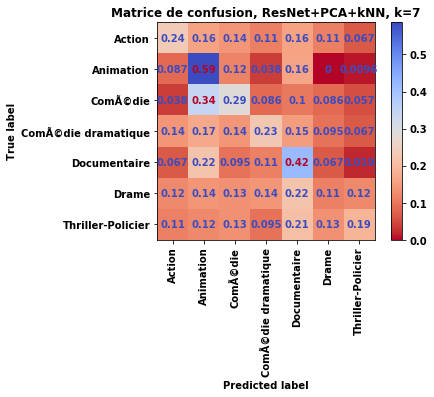

In [40]:
from utils.display.results_display import ConfusionMatrix_display

title = 'ResNet+PCA+kNN, k='+str(k) 
ConfusionMatrix_display(test_genres, predicted_genres, config['genres'], title)

Plus proches voisins pour quelques posters du testing set

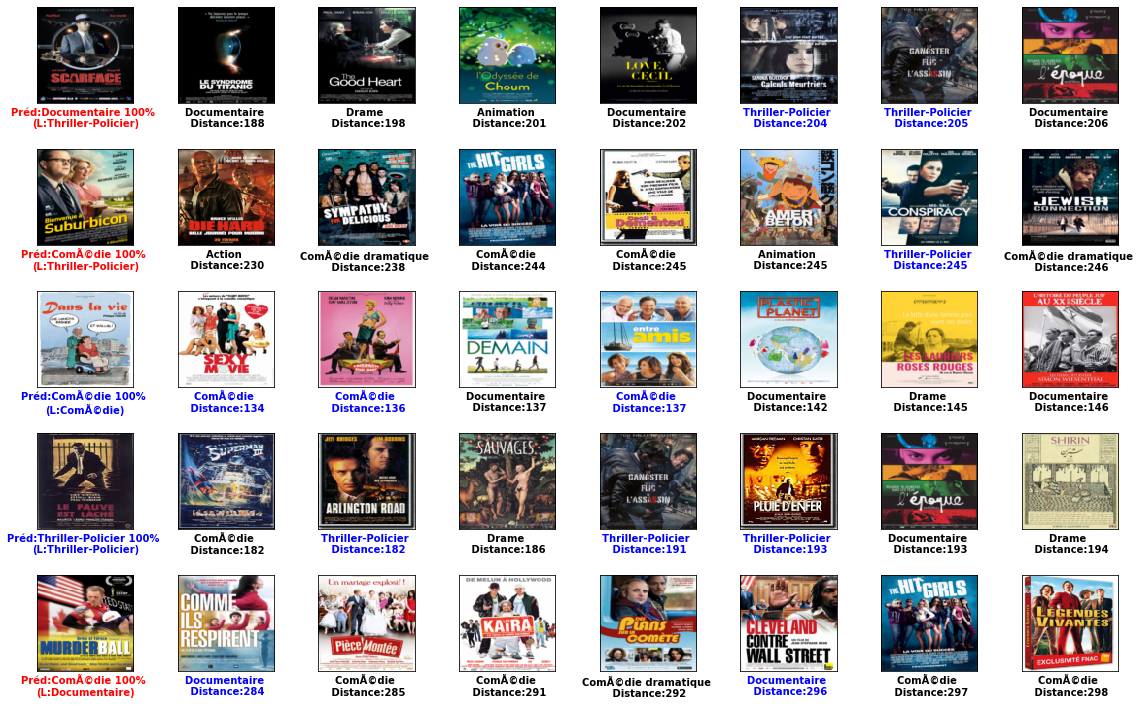

In [15]:
from utils.display.results_display import plot_neighbors
%matplotlib inline

starting_index = np.random.randint(0, 700)
num_images = 5
plot_neighbors(test_posters, test_genres, class_names, predicted_genres, starting_index, num_images, train_posters, train_genres, knn.neighbors, knn.distances, str(starting_index))

## PCA 2D

In [ ]:
import matplotlib.pyplot as plt

def display2D(X_ortho, Y):
    colors = Y.argmax(axis=1)
    
    fig = plt.figure(figsize=(10, 10))
    scatter = plt.scatter(X_ortho[:, 0], X_ortho[:, 1], c=colors)
    plt.legend(*scatter.legend_elements())
    
    plt.show(fig)

In [ ]:
pca = PCA(n_components=2)
# pca.fit(train_posters.reshape(len(train_posters), -1))

train_pca = pca.transform(train_posters.reshape(len(train_posters), -1))
# test_pca = pca.transform(test_posters.reshape(len(train_posters), -1))

display2D(train_pca, train_genres)
display2D(train_resnet_pca[:, :2], train_genres)

#Attention: l'erreur dans la VM vient de la version de matplotlib; et upgrade vers matplotlib 3.1.X pas possible
#Changer version Python...